In [1]:
DATA_DIR = "../data/simulation"

In [2]:
# !du -sh ~

In [3]:
import glob
import pandas as pd

# Pattern for all summary.txt files in subfolders
pattern = "../data/simulation/scope_output/*/summary.txt"

# Get file paths
filepaths = glob.glob(pattern)

# Create a list of dicts with filepath and file contents
data = []
for path in filepaths:
    try:
        with open(path, 'r') as f:
            content = f.read().strip()
        data.append({"filepath": path, "summary": content})
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Show result
print(df.head())
print(f"\nTotal files read: {len(df)}")

                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n1000_m10_size...   
3  ../data/simulation/scope_output/n1000_m15_size...   
4  ../data/simulation/scope_output/n10000_m10_siz...   

                                   summary  
0  #UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0  
1    #UNIQUE SOLUTIONS: 5 WITH VALUE 954.0  
2   #UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0  
3   #UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0  
4   #UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0  

Total files read: 1089


In [4]:
df

,filepath,summary
0,../data/simulation/scope_output/n10000_m15_siz...,#UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0
1,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 954.0
2,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0
3,../data/simulation/scope_output/n1000_m15_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0
4,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0
...,...,...
1084,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 1 WITH VALUE 2553.0
1085,../data/simulation/scope_output/n10000_m5_size...,#UNIQUE SOLUTIONS: 1 WITH VALUE 5036.0
1086,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 1009.0
1087,../data/simulation/scope_output/n5000_m15_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 15044.0


In [5]:
import re
import pandas as pd

# Example: assume df["content"] already exists
pattern = r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([-\w\.]+)"

# Apply regex extraction
df[["unique_solutions", "value"]] = (
    df["summary"].str.extract(pattern)
)

# Convert numeric columns if possible
df["unique_solutions"] = pd.to_numeric(df["unique_solutions"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# View result
print(df.head())


                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n1000_m10_size...   
3  ../data/simulation/scope_output/n1000_m15_size...   
4  ../data/simulation/scope_output/n10000_m10_siz...   

                                   summary  unique_solutions    value  
0  #UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0                 2  15255.0  
1    #UNIQUE SOLUTIONS: 5 WITH VALUE 954.0                 5    954.0  
2   #UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0                 5   1009.0  
3   #UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0                 5   1562.0  
4   #UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0                 1   5017.0  


In [6]:
df_0 = df[df['unique_solutions'] == 0]
df_0

,filepath,summary,unique_solutions,value
26,../data/simulation/scope_output/n1000_m15_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
31,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
182,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
224,../data/simulation/scope_output/n1000_m5_size1...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
333,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
406,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
553,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
767,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
792,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
821,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN


In [7]:
# df_0['filepath'][75]

In [8]:
# !cat ../data/simulation/scope_output/n5000_m15_size1000_cov0.02_p5_s4/log

In [9]:
# import os
# import shutil

# for path in df_0["filepath"]:
#     folder = os.path.dirname(path)  # get parent folder
#     if os.path.exists(folder):
#         print(f"Deleting: {folder}")
#         shutil.rmtree(folder)

In [10]:
df['unique_solutions'].value_counts()

unique_solutions
5    655
1    317
2     78
0     15
3     15
4      9
Name: count, dtype: int64

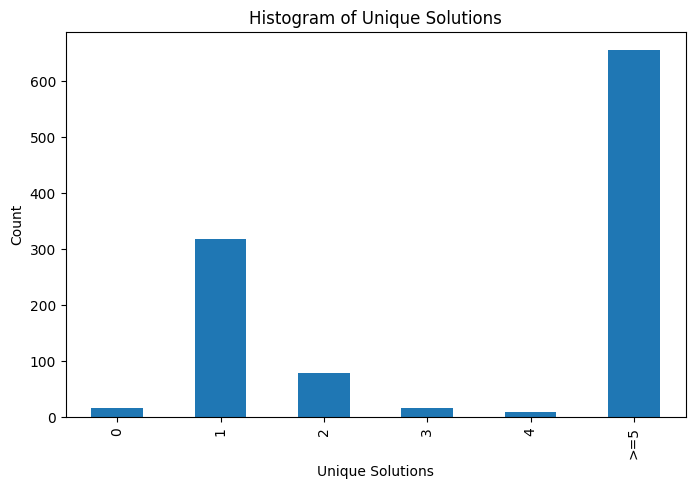

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define bins and labels
bins = list(range(0, 6)) + [np.inf]   # 0–1, 1–2, ..., 10+
labels = [str(i) for i in range(0, 5)] + [">=5"]

# Bin the values
df["unique_solutions_bin"] = pd.cut(
    df["unique_solutions"],
    bins=bins,
    labels=labels,
    right=False
)

# Ensure all bins are represented (even empty ones)
counts = df["unique_solutions_bin"].value_counts().reindex(labels, fill_value=0)

# Plot
counts.plot(kind="bar", figsize=(8,5))
plt.title("Histogram of Unique Solutions")
plt.xlabel("Unique Solutions")
plt.ylabel("Count")
plt.show()


In [9]:
print(df['filepath'][0])

../data/simulation/scope_output/n10000_m15_size1000_cov0.05_p5_s0/summary.txt


In [21]:
!cat ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt

#UNIQUE SOLUTIONS: 1 WITH VALUE 14224.0


## Correctness of solution

In [56]:
SIMULATION_STR = "n1000_m5_size100_cov0.1_p5_s1"

GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output/{SIMULATION_STR}"

## Are clusters in correct order??

In [57]:
import pandas as pd
import numpy as np

In [58]:
char_matrix = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_character_matrix_without_noise.parquet")
char_matrix

,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m515,m516,m517,m518,m519,m520,m521,m522,m523,cluster_id
s0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
s1,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,3
s2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
s3,1,0,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,3
s4,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s995,1,0,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,3
s996,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,2
s997,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,0,3
s998,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,3


In [59]:
B_truth = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_multi_state_tree_node_character_matrix.parquet")
B_truth

,c0,c1,c2,c3,c4,cluster_id
root,0,0,0,0,0,0
d1,0,0,0,0,0,1
c0,1,0,0,0,0,1
d2,1,0,0,0,0,2
d3,1,0,0,0,0,3
c1,1,1,0,0,0,3
c2,1,1,1,0,0,3
c3,1,1,0,1,0,3
c4,1,1,0,1,1,3
d4,1,1,0,1,0,4


In [60]:
!ls "../data/simulation/ground_truth/n10000_m15_size500_cov0.02_p10_s0"

sim.benchmark
sim_character_matrix.parquet
sim_character_matrix_without_noise.parquet
sim_clone_cluster_cell_fractions.svg
sim_cn_tree.svg
sim_copy_numbers.parquet
sim.err.log
sim.log
sim_merged_tree.svg
sim_multi_state_character_matrix.parquet
sim_multi_state_tree_node_character_matrix.parquet
sim_mutation_group.parquet
sim_mutation_to_bin_mapping.parquet
sim_read_count.parquet
sim_read_count_without_missing.parquet
sim_spectral_clustering.svg
sim_tree.dot
sim_tree_edgelist.csv
sim_tree.newick
sim_T.svg
sim_variant_count.parquet
sim_variant_count_without_missing.parquet


In [61]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree

,0,1
0,root,d1
1,root,s5
2,root,s10
3,root,s21
4,root,s24
...,...,...
1004,d4,s972
1005,d4,s979
1006,d4,s984
1007,d4,s985


In [62]:
num_mutations = B_truth.shape[1] - 1
num_mutations

5

In [63]:
Tree_mut = Tree[~Tree[1].str.startswith('s')]
Tree_mut

,0,1
0,root,d1
120,d1,c0
219,c0,d2
220,c0,d3
403,d3,c1
490,c1,c2
491,c1,c3
688,c3,c4
689,c3,d4


In [64]:
X = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/X.csv", index_col=0).astype(int)
X

,0
0,1
1,1
2,1
3,1
4,1


In [65]:
predicted_B = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/B.csv", index_col=0).astype(int)
predicted_B

,0,1,2,3,4
0,0,0,0,0,0
1,1,0,0,0,0
2,1,1,0,0,0
3,1,1,0,1,0
4,1,1,1,1,0
5,1,0,0,0,1
A,0,0,0,0,0
B,0,0,0,0,0
C,1,0,0,0,0
D,1,0,0,0,0


In [66]:
import networkx as nx

In [67]:
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)
    

In [68]:
T_truth.edges

OutEdgeView([('root', 'd1'), ('d1', 'c0'), ('c0', 'd2'), ('c0', 'd3'), ('d3', 'c1'), ('c1', 'c2'), ('c1', 'c3'), ('c3', 'c4'), ('c3', 'd4')])

In [69]:
total = 0
correct = 0

for i in range(num_mutations):
    for j in range(num_mutations):
        if i != j and nx.has_path(T_truth, f"c{i}", f"c{j}"):
            total += 1
            print(i, '->' ,j)
            # How has scope predicted?
            if X.iloc[i, 0] and X.iloc[j, 0]:
                is_predicted_correctly = np.all(predicted_B.iloc[:, i] >= predicted_B.iloc[:, j])
                if is_predicted_correctly:
                    correct += 1

print(total, correct, correct / total)

0 -> 1
0 -> 2
0 -> 3
0 -> 4
1 -> 2
1 -> 3
1 -> 4
3 -> 4
8 6 0.75


In [70]:
def find_accuracy(SIMULATION_STR):

    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
    SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output/{SIMULATION_STR}"

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    X = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/X.csv", index_col=0).astype(int)

    Tree_mut = Tree[~Tree[1].str.startswith('s')]

    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    total = 0
    correct = 0

    for i in range(num_mutations):
        for j in range(num_mutations):
            if i != j and nx.has_path(T_truth, f"c{i}", f"c{j}"):
                total += 1
                # How has scope predicted?
                if X.iloc[i, 0] and X.iloc[j, 0]:
                    is_predicted_correctly = np.all(predicted_B.iloc[:, i] >= predicted_B.iloc[:, j])
                    if is_predicted_correctly:
                        correct += 1

    return total, correct, correct / total

In [75]:
import os

base_path = "../data/simulation/scope_output"

folders = [
    name
    for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name))
]

print(folders)

['n10000_m15_size1000_cov0.02_p15_s2', 'n1000_m10_size100_cov0.02_p5_s4', 'n1000_m10_size100_cov0.02_p5_s0', 'n1000_m15_size100_cov0.1_p5_s3', 'n10000_m10_size500_cov0.1_p15_s2', 'n10000_m5_size1000_cov0.1_p15_s2', 'n10000_m15_size1000_cov0.05_p5_s0', 'n1000_m5_size500_cov0.1_p5_s3', 'n5000_m15_size500_cov0.05_p10_s3', 'n10000_m5_size1000_cov0.05_p5_s3', 'n1000_m5_size1000_cov0.05_p15_s4', 'n5000_m15_size100_cov0.05_p15_s3', 'n10000_m10_size500_cov0.02_p5_s0', 'n5000_m15_size500_cov0.02_p5_s1', 'n5000_m15_size100_cov0.02_p5_s3', 'n1000_m5_size500_cov0.1_p10_s1', 'n5000_m15_size100_cov0.1_p15_s1', 'n5000_m10_size100_cov0.02_p10_s3', 'n1000_m10_size100_cov0.1_p5_s3', 'n1000_m5_size500_cov0.02_p5_s0', 'n1000_m15_size1000_cov0.1_p15_s0', 'n1000_m5_size100_cov0.05_p15_s1', 'n5000_m15_size100_cov0.05_p10_s2', 'n5000_m10_size500_cov0.1_p15_s2', 'n5000_m15_size500_cov0.1_p10_s1', 'n5000_m5_size100_cov0.1_p15_s1', 'n10000_m15_size1000_cov0.1_p10_s2', 'n1000_m15_size100_cov0.02_p15_s1', 'n10000_

In [76]:
# folders = ['n1000_m5_size100_cov0.1_p5_s1']

In [83]:
accuracies_10000 = []
accuracies_5000 = []
accuracies_1000 = []
accuracies = []

for folder in folders:
    try:
        _, _, accuracy = find_accuracy(SIMULATION_STR = folder)
        accuracies.append(accuracy)
        if folder.startswith('n10000'): accuracies_10000.append(accuracy)
        if folder.startswith('n5000'): accuracies_5000.append(accuracy)
        if folder.startswith('n1000'): accuracies_1000.append(accuracy)
    except Exception as e:
        accuracies.append(0)

In [84]:
accuracies

[0.6,
 0.25,
 0.6666666666666666,
 0.6,
 0.6666666666666666,
 0.6,
 0.75,
 0.75,
 0.6666666666666666,
 0.75,
 0.8333333333333334,
 0.6666666666666666,
 0.6666666666666666,
 0.5714285714285714,
 0.6,
 0.6,
 0.8,
 0.6666666666666666,
 0.75,
 0.6,
 0.6666666666666666,
 0.75,
 0.75,
 0.6666666666666666,
 0.6,
 0.75,
 0.75,
 0,
 0.5714285714285714,
 0.6666666666666666,
 0.8,
 0.6,
 0,
 0.8571428571428571,
 0.5714285714285714,
 0.6666666666666666,
 0.8,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.8,
 0.5714285714285714,
 0,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.75,
 0.6,
 0.75,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.25,
 0.6666666666666666,
 0.5714285714285714,
 0.6,
 0.5714285714285714,
 0.8571428571428571,
 0.75,
 0.8,
 0.6666666666666666,
 0.75,
 0.75,
 0.6666666666666666,
 0.25,
 0.75,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.75,
 0.6666666666666666,
 0.8571428571428571,
 0.6,
 0.75,
 0.5

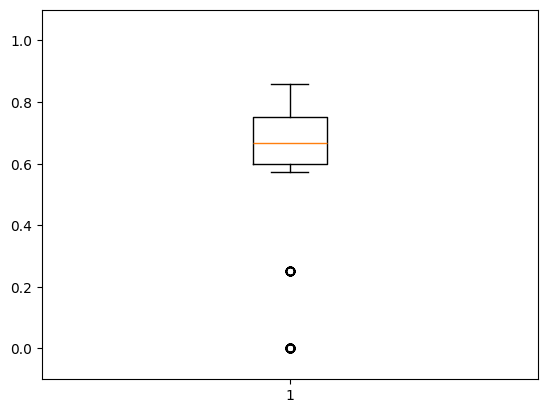

In [88]:
plt.boxplot(accuracies)
plt.ylim((-0.1, 1.1))
plt.show()

# Pairwise anestry relationship evaluation

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [52]:
import sys
sys.path.append('..')

from src.phylogeny_utils import generate_perfect_phylogeny

In [53]:
def calculate_pairwise_ancestry_accuracy_for_scope(
        SIMULATION_STR, 
        type="GIVEN_MUTATION_CLUSTERING", 
        remove_unassigned_groups=False
    ):

    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"

    ground_truth_mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
    ground_truth_mutation_group.set_index('mutation', inplace=True)

    if type == "GIVEN_MUTATION_CLUSTERING":
        INPUT_FOLDER = "scope_input"
        OUTPUT_FOLDER = "scope_output"
        
        methods_mutation_group = ground_truth_mutation_group.copy()
    else:
        if type == "KMEANS_GIVEN_K":
            INPUT_FOLDER = "scope_input_kmeans_known_k"
            OUTPUT_FOLDER = "scope_output_kmeans_known_k"
        elif type == "KMEANS":
            INPUT_FOLDER = "scope_input_kmeans"
            OUTPUT_FOLDER = "scope_output_kmeans"
        else:
            raise ValueError("Unknown type", type)

        SCOPE_INPUT_DIR = f"../data/simulation/{INPUT_FOLDER}/{SIMULATION_STR}"
        
        methods_mutation_group = pd.read_csv(f"{SCOPE_INPUT_DIR}/kmeans_clones.csv", index_col=0)
        methods_mutation_group["mutation"] = methods_mutation_group["mutation"].str[1:].astype(int)
        methods_mutation_group.set_index("mutation", inplace=True)

    merged_mutation_group = pd.merge(ground_truth_mutation_group, methods_mutation_group, how='left', on='mutation', suffixes=['_ground_truth', '_method'])

    mutation_group_pair_counts = merged_mutation_group.value_counts(['mutation_group_ground_truth', 'mutation_group_method']).reset_index(name='mutation_counts')

    total_ground_truth_mutation_groups = int(ground_truth_mutation_group['mutation_group'].max()) + 1
    total_methods_mutation_groups = int(methods_mutation_group['mutation_group'].max()) + 1
    total_mutations = int(ground_truth_mutation_group.index.max()) + 1

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    B_mat = pd.read_csv(f"../data/simulation/{OUTPUT_FOLDER}/{SIMULATION_STR}/solution_0/B.csv", index_col=0)
    solT, _ = generate_perfect_phylogeny(B_mat)

    us = []; vs = []; rels = []

    for i in range(total_ground_truth_mutation_groups):
        for j in range(total_ground_truth_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rels.append(3)
            elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rels.append(4)
            else: rels.append(2)

    ground_truth_ancestry = pd.DataFrame({ 'u1': us, 'v1': vs, 'rel1': rels })

    us = []; vs = []; rels = []

    for i in range(total_methods_mutation_groups):
        for j in range(total_methods_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif not solT.has_node(str(i)) or not solT.has_node(str(j)): rels.append(0) 
            elif nx.has_path(solT, str(i), str(j)): rels.append(3)
            elif nx.has_path(solT, str(j), str(i)): rels.append(4)
            else: rels.append(2)

    methods_ancestry = pd.DataFrame({ 'u2': us, 'v2': vs, 'rel2': rels })

    merged_ancestry = pd.merge(ground_truth_ancestry, methods_ancestry, how='cross')

    calc = pd.merge(merged_ancestry, mutation_group_pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'u1u2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc = pd.merge(calc, mutation_group_pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'v1v2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc['u1u2'] = calc['u1u2'].fillna(0)
    calc['v1v2'] = calc['v1v2'].fillna(0)
    calc['prod'] = calc['u1u2'] * calc['v1v2']

    if remove_unassigned_groups: calc = calc[calc['rel2'] != 0]

    calc['match'] = (calc['rel1'] == calc['rel2']).astype(int)

    total = (total_mutations * ( total_mutations - 1) ) // 2
    matched_prod = (calc['match'] * calc['prod']).sum()
    ## TODO: Need to do - total_pred_mutations instead of total_mutations
    correct = (matched_prod - total_mutations) // 2
    
    accuracy = correct / total

    return total, correct, accuracy

# calculate_pairwise_ancestry_accuracy(SIMULATION_STR)

In [54]:
def calculate_pairwise_ancestry_accuracy_for_scope_post(
        SIMULATION_STR, 
        type="KMEANS", 
        remove_unassigned_groups=False
    ):

    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"

    ground_truth_mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
    ground_truth_mutation_group.set_index('mutation', inplace=True)

    
    if type == "KMEANS_GIVEN_K":
        INPUT_FOLDER = "scope_input_kmeans_known_k"
        OUTPUT_FOLDER = "scope_output_kmeans_known_k"
        POST_KMEANS_DIR = "scope_post_kmeans_known_k"
    elif type == "KMEANS":
        INPUT_FOLDER = "scope_input_kmeans"
        OUTPUT_FOLDER = "scope_output_kmeans"
        POST_KMEANS_DIR = "scope_post_kmeans"
    else:
        raise ValueError("Unknown type", type)

    SCOPE_INPUT_DIR = f"../data/simulation/{INPUT_FOLDER}/{SIMULATION_STR}"
    
    methods_mutation_group = pd.read_csv(f"../data/simulation/{POST_KMEANS_DIR}/{SIMULATION_STR}/kmeans_cleaned_clones.csv", index_col=0)
    methods_mutation_group["mutation"] = methods_mutation_group["mutation"].str[1:].astype(int)
    methods_mutation_group.set_index("mutation", inplace=True)

    merged_mutation_group = pd.merge(ground_truth_mutation_group, methods_mutation_group, how='left', on='mutation', suffixes=['_ground_truth', '_method'])

    mutation_group_pair_counts = merged_mutation_group.value_counts(['mutation_group_ground_truth', 'mutation_group_method']).reset_index(name='mutation_counts')

    total_ground_truth_mutation_groups = int(ground_truth_mutation_group['mutation_group'].max()) + 1
    total_methods_mutation_groups = int(methods_mutation_group['mutation_group'].max()) + 1
    total_mutations = int(ground_truth_mutation_group.index.max()) + 1

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    B_mat = pd.read_csv(f"../data/simulation/{OUTPUT_FOLDER}/{SIMULATION_STR}/solution_0/B.csv", index_col=0)
    solT, _ = generate_perfect_phylogeny(B_mat)

    us = []; vs = []; rels = []

    for i in range(total_ground_truth_mutation_groups):
        for j in range(total_ground_truth_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rels.append(3)
            elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rels.append(4)
            else: rels.append(2)

    ground_truth_ancestry = pd.DataFrame({ 'u1': us, 'v1': vs, 'rel1': rels })

    us = []; vs = []; rels = []

    for i in range(total_methods_mutation_groups):
        for j in range(total_methods_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif not solT.has_node(str(i)) or not solT.has_node(str(j)): rels.append(0) 
            elif nx.has_path(solT, str(i), str(j)): rels.append(3)
            elif nx.has_path(solT, str(j), str(i)): rels.append(4)
            else: rels.append(2)

    methods_ancestry = pd.DataFrame({ 'u2': us, 'v2': vs, 'rel2': rels })

    merged_ancestry = pd.merge(ground_truth_ancestry, methods_ancestry, how='cross')

    calc = pd.merge(merged_ancestry, mutation_group_pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'u1u2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc = pd.merge(calc, mutation_group_pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'v1v2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc['u1u2'] = calc['u1u2'].fillna(0)
    calc['v1v2'] = calc['v1v2'].fillna(0)
    calc['prod'] = calc['u1u2'] * calc['v1v2']

    if remove_unassigned_groups: calc = calc[calc['rel2'] != 0]

    calc['match'] = (calc['rel1'] == calc['rel2']).astype(int)

    total = (total_mutations * ( total_mutations - 1) ) // 2
    matched_prod = (calc['match'] * calc['prod']).sum()
    correct = (matched_prod - total_mutations) // 2
    
    accuracy = correct / total

    return total, correct, accuracy

# calculate_pairwise_ancestry_accuracy(SIMULATION_STR)

In [55]:
SIMULATION_STR = 'n5000_m15_size1000_cov0.05_p15_s2'

def calculate_pairwise_ancestry_accuracy_for_phertilizer(SIMULATION_STR, collapse=False):

    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
    PHERTILIZER_OUTPUT_DIR = f"../data/simulation/phertilizer_output/{SIMULATION_STR}"

    mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
    mutation_group.set_index('mutation', inplace=True)

    df_snv_clusters = pd.read_csv(f"{PHERTILIZER_OUTPUT_DIR}/snv_clusters.csv")
    df_snv_clusters['mutation'] = df_snv_clusters['mutation'].str[3:].astype(int)
    df_snv_clusters.set_index('mutation', inplace=True)
    df_snv_clusters.sort_index(inplace=True)

    df_merged = pd.merge(mutation_group, df_snv_clusters, left_index=True, right_index=True, how='left')
    df_merged['cluster'] = df_merged['cluster'].fillna(-1).astype(int)

    pair_counts = df_merged.value_counts(['mutation_group', 'cluster'])

    total_mutation_groups = int(df_merged['mutation_group'].max()) + 1
    total_mutation_groups_pred = int(df_merged['cluster'].max()) + 1
    total_mutations = int(df_merged.index.max()) + 1
    total_mutations_pred = (df_merged['cluster'] != -1).sum()

    # print(total_mutations_pred)

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    T_phert = nx.DiGraph()

    edges = []
    leaves = []

    with open(f"{PHERTILIZER_OUTPUT_DIR}/tree.txt", "r") as f:
        lines = f.readlines()
        
        n_edges = int(lines[0].split()[0])
        
        for line in lines[1:n_edges+1]:
            u, v = map(int, line.split())
            edges.append((u, v))
            T_phert.add_edge(u, v)
        

    mutation_group_ancestral_relation = np.zeros((total_mutation_groups, total_mutation_groups), dtype=int)

    for i in range(total_mutation_groups):
        for j in range(total_mutation_groups):
            if i == j: continue
            if nx.has_path(T_truth, f'c{i}', f'c{j}'):
                mutation_group_ancestral_relation[i][j] = 1

    us = []
    vs = []
    rel = []

    for i in range(total_mutation_groups):
        for j in range(total_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rel.append(1)
            elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rel.append(3)
            elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rel.append(4)
            else: rel.append(2)

    true_ancestry_df = pd.DataFrame({
        'u1': us,
        'v1': vs,
        'rel1': rel 
    })

    us = []
    vs = []
    rel = []

    for i in range(total_mutation_groups_pred):
        for j in range(total_mutation_groups_pred):
            us.append(i)
            vs.append(j)
            if i == j: rel.append(1)
            elif not T_phert.has_node(i) or not T_phert.has_node(j): rel.append(0)
            elif nx.has_path(T_phert, i, j): rel.append(3)
            elif nx.has_path(T_phert, j, i): rel.append(4)
            else: rel.append(2)

    pred_ancestry_df = pd.DataFrame({
        'u2': us,
        'v2': vs,
        'rel2': rel 
    })

    merged_ancestry = pd.merge(true_ancestry_df, pred_ancestry_df, how='cross')

    merged_ancestry_ = pd.merge(merged_ancestry, pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group', 'cluster'], how='left')
    merged_ancestry_.rename(columns={'count': 'u1u2'}, inplace=True)
    merged_ancestry_ = pd.merge(merged_ancestry_, pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group', 'cluster'], how='left')
    merged_ancestry_.rename(columns={'count': 'v1v2'}, inplace=True)
    merged_ancestry_ = merged_ancestry_.fillna(0)

    merged_ancestry_["prod"] = merged_ancestry_["u1u2"] * merged_ancestry_["v1v2"]
    merged_ancestry_["match"] = (merged_ancestry_["rel1"] == merged_ancestry_["rel2"]).astype(int)

    merged_ancestry_ = merged_ancestry_[merged_ancestry_["rel2"] != 0]

    # TODO: Fix the difference addition for scope
    
    total_pairs = (total_mutations * (total_mutations - 1)) // 2

    match_prod = (merged_ancestry_["prod"] * merged_ancestry_["match"]).sum()
    correct_pairs = (match_prod - total_mutations_pred) // 2

    phert_acc = correct_pairs / total_pairs

    return total_pairs, correct_pairs, phert_acc

_, _, phert_acc = calculate_pairwise_ancestry_accuracy_for_phertilizer(SIMULATION_STR)

phert_acc


np.float64(0.8495944108582488)

## SBMClone

In [56]:
def calculate_pairwise_ancestry_accuracy_for_sbmclone(SIMULATION_STR):
    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"

    ground_truth_mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
    ground_truth_mutation_group.set_index('mutation', inplace=True)

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)
    
    SBMCLONE_OUT_DIR = f"../data/simulation/sbmclone_output/{SIMULATION_STR}"

    with open(f"{SBMCLONE_OUT_DIR}/cluster-assignments.txt", "r") as f:
        lines = f.readlines()

    row_assignments = [int(x) for x in lines[0].strip().split(",")]
    col_assignments = [int(x) for x in lines[1].strip().split(",")]

    methods_mutation_group = pd.DataFrame({
        "mutation": np.arange(len(col_assignments)),
        "mutation_group": col_assignments
    })
    methods_mutation_group.set_index("mutation", inplace=True)
    methods_mutation_group['mutation_group'] = methods_mutation_group['mutation_group'] - 1

    merged_mutation_group = pd.merge(ground_truth_mutation_group, methods_mutation_group, how='left', on='mutation', suffixes=['_ground_truth', '_method'])

    mutation_group_pair_counts = merged_mutation_group.value_counts(['mutation_group_ground_truth', 'mutation_group_method']).reset_index(name='mutation_counts')

    total_ground_truth_mutation_groups = int(ground_truth_mutation_group['mutation_group'].max()) + 1
    total_methods_mutation_groups = int(methods_mutation_group['mutation_group'].max()) + 1
    total_mutations = int(ground_truth_mutation_group.index.max()) + 1

    us = []; vs = []; rels = []

    for i in range(total_ground_truth_mutation_groups):
        for j in range(total_ground_truth_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rels.append(3)
            elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rels.append(4)
            else: rels.append(2)

    ground_truth_ancestry = pd.DataFrame({ 'u1': us, 'v1': vs, 'rel1': rels })
    
    blockmatrix = pd.read_csv(f"{SBMCLONE_OUT_DIR}/blockmatrix.csv", header=None)
    B_mat = (blockmatrix > 0.01).astype(int)
    solT, _ = generate_perfect_phylogeny(B_mat)

    us = []; vs = []; rels = []

    for i in range(total_methods_mutation_groups):
        for j in range(total_methods_mutation_groups):
            us.append(i)
            vs.append(j)
            if i == j: rels.append(1)
            elif not solT.has_node(str(i)) or not solT.has_node(str(j)): rels.append(0) 
            elif nx.has_path(solT, str(i), str(j)): rels.append(3)
            elif nx.has_path(solT, str(j), str(i)): rels.append(4)
            else: rels.append(2)

    methods_ancestry = pd.DataFrame({ 'u2': us, 'v2': vs, 'rel2': rels })

    merged_ancestry = pd.merge(ground_truth_ancestry, methods_ancestry, how='cross')

    calc = pd.merge(merged_ancestry, mutation_group_pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'u1u2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc = pd.merge(calc, mutation_group_pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
    calc.rename(columns={'mutation_counts': 'v1v2'}, inplace=True)
    calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
    calc['u1u2'] = calc['u1u2'].fillna(0)
    calc['v1v2'] = calc['v1v2'].fillna(0)
    calc['prod'] = calc['u1u2'] * calc['v1v2']

    # if remove_unassigned_groups: calc = calc[calc['rel2'] != 0]

    calc['match'] = (calc['rel1'] == calc['rel2']).astype(int)

    total = (total_mutations * ( total_mutations - 1) ) // 2
    matched_prod = (calc['match'] * calc['prod']).sum()
    ## TODO: Need to do - total_pred_mutations instead of total_mutations
    correct = (matched_prod - total_mutations) // 2

    accuracy = correct / total

    # return total, correct, accuracy, calc, solT
    return total, correct, accuracy

SIMULATION_STR = 'n10000_m5_size100_cov0.1_p5_s1'

# _, _, accuracy, calc, solT = calculate_pairwise_ancestry_accuracy_for_sbmclone(SIMULATION_STR)
_, _, accuracy = calculate_pairwise_ancestry_accuracy_for_sbmclone(SIMULATION_STR)
print(accuracy)
# print(calc)
# print(solT.edges)


0.12164114839519508


## Group All Results Together

In [1]:
def make_results_df(fn):
    # parameters
    ncells = [1000, 5000, 10000]
    n_mutation_groups = [5, 10, 15]
    mutation_group_sizes = [100, 500, 1000]
    nclusters = [5, 10, 15]
    coverages = [0.02, 0.05, 0.1]
    seeds = np.arange(5)

    ncells_list = []
    n_mutation_groups_list = []
    mutation_group_sizes_list = []
    n_clusters_list = []
    coverages_list = []
    seeds_list = []
    accuracies_list = []
    failures_list = []

    for ncell in ncells:
        for n_mutation_group in n_mutation_groups:
            for mutation_group_size in mutation_group_sizes:
                for coverage in coverages:
                    for ncluster in nclusters:
                        for seed in seeds:
                            ncells_list.append(ncell)
                            n_mutation_groups_list.append(n_mutation_group)
                            mutation_group_sizes_list.append(mutation_group_size)
                            coverages_list.append(coverage)
                            n_clusters_list.append(ncluster)
                            seeds_list.append(seed)
                            try:
                                SIMULATION_STR = f'n{ncell}_m{n_mutation_group}_size{mutation_group_size}_cov{str(coverage)}_p{ncluster}_s{seed}'
                                _, _, accuracy = fn(SIMULATION_STR)
                                accuracies_list.append(accuracy)
                                failures_list.append(None)
                            except Exception as e:
                                accuracies_list.append(None)
                                failures_list.append(e)

    results_df = pd.DataFrame({
        'ncells': ncells_list,
        'n_mutation_groups': n_mutation_groups_list,
        'mutation_group_size': mutation_group_sizes_list,
        'coverage': coverages_list,
        'n_clusters': n_clusters_list,
        'seed': seeds_list,
        'accuracy': accuracies_list,
        'error': failures_list,
    })

    return results_df
    

In [58]:
results_given_cluster_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR))
results_given_k_kmeans_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR, type="KMEANS_GIVEN_K"))
results_kmeans_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR, type="KMEANS"))

In [59]:
results_phertilizer_df = make_results_df(calculate_pairwise_ancestry_accuracy_for_phertilizer)

In [60]:
results_kmeans_post_df = make_results_df(lambda STR: calculate_pairwise_ancestry_accuracy_for_scope_post(STR, type="KMEANS"))
results_given_k_kmeans_post_df = make_results_df(lambda STR: calculate_pairwise_ancestry_accuracy_for_scope_post(STR, type="KMEANS_GIVEN_K"))

In [61]:
results_sbmclone_df = make_results_df(calculate_pairwise_ancestry_accuracy_for_sbmclone)
results_sbmclone_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy,error
0,1000,5,100,0.02,5,0,0.134688,None
1,1000,5,100,0.02,5,1,0.089625,None
2,1000,5,100,0.02,5,2,0.122324,None
3,1000,5,100,0.02,5,3,0.120941,None
4,1000,5,100,0.02,5,4,0.128217,None
...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,0.029733,None
1211,10000,15,1000,0.10,15,1,0.041811,None
1212,10000,15,1000,0.10,15,2,0.026294,None
1213,10000,15,1000,0.10,15,3,0.033479,None


In [62]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in results_given_cluster_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(results_given_cluster_df, results_given_k_kmeans_df, on=merge_on, suffixes=['_given_clusters', '_given_k_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, results_kmeans_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_kmeans', 'error': 'error_kmeans'}, inplace=True)
results_df_3 = pd.merge(results_df_2, results_phertilizer_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_4 = pd.merge(results_df_3, results_given_k_kmeans_post_df, on=merge_on, how='left')
results_df_4.rename(columns={'accuracy': 'accuracy_given_k_kmeans_post', 'error': 'error_given_k_kmeans_post'}, inplace=True)
results_df_5 = pd.merge(results_df_4, results_kmeans_post_df, on=merge_on, how='left')
results_df_5.rename(columns={'accuracy': 'accuracy_kmeans_post', 'error': 'error_kmeans_post'}, inplace=True)
results_df_6 = pd.merge(results_df_5, results_sbmclone_df, on=merge_on, how='left')
results_df_6.rename(columns={'accuracy': 'accuracy_sbmclone', 'error': 'error_sbmclone'}, inplace=True)


results_df = results_df_6

['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [63]:
results_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post,accuracy_sbmclone,error_sbmclone
0,1000,5,100,0.02,5,0,1.000000,None,0.212072,None,0.212072,None,0.470046,None,0.337140,None,0.337140,None,0.134688,None
1,1000,5,100,0.02,5,1,0.519609,None,0.476092,None,0.476092,None,0.199955,None,0.476092,None,0.476092,None,0.089625,None
2,1000,5,100,0.02,5,2,1.000000,None,0.383371,None,0.476761,None,0.418695,None,0.493112,None,0.476761,None,0.122324,None
3,1000,5,100,0.02,5,3,1.000000,None,0.656200,None,0.656200,None,0.355762,None,0.656200,None,0.656200,None,0.120941,None
4,1000,5,100,0.02,5,4,1.000000,None,0.570083,None,0.570083,None,0.353868,None,0.570083,None,0.570083,None,0.128217,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,0.975026,None,0.955746,None,0.740449,None,0.755036,None,0.978902,None,0.740449,None,0.029733,None
1211,10000,15,1000,0.10,15,1,0.962534,None,0.804437,None,0.884497,None,NaN,[Errno 2] No such file or directory: '../data/...,0.896660,None,0.966077,None,0.041811,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.797396,None,0.861144,None,0.802592,None,0.898885,None,0.973787,None,0.026294,None
1213,10000,15,1000,0.10,15,3,0.991226,None,0.905604,None,0.708512,None,0.870899,None,0.965933,None,0.708512,None,0.033479,None


In [64]:
common_results = results_df.dropna(
    subset=['accuracy_given_clusters', 'accuracy_given_k_kmeans', 'accuracy_kmeans', 'accuracy_phertilizer', 'accuracy_sbmclone']
)
common_results

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post,accuracy_sbmclone,error_sbmclone
0,1000,5,100,0.02,5,0,1.000000,None,0.212072,None,0.212072,None,0.470046,None,0.337140,None,0.337140,None,0.134688,None
1,1000,5,100,0.02,5,1,0.519609,None,0.476092,None,0.476092,None,0.199955,None,0.476092,None,0.476092,None,0.089625,None
2,1000,5,100,0.02,5,2,1.000000,None,0.383371,None,0.476761,None,0.418695,None,0.493112,None,0.476761,None,0.122324,None
3,1000,5,100,0.02,5,3,1.000000,None,0.656200,None,0.656200,None,0.355762,None,0.656200,None,0.656200,None,0.120941,None
4,1000,5,100,0.02,5,4,1.000000,None,0.570083,None,0.570083,None,0.353868,None,0.570083,None,0.570083,None,0.128217,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,0.991118,None,0.899169,None,0.715658,None,0.470841,None,0.966571,None,0.715658,None,0.035595,None
1210,10000,15,1000,0.10,15,0,0.975026,None,0.955746,None,0.740449,None,0.755036,None,0.978902,None,0.740449,None,0.029733,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.797396,None,0.861144,None,0.802592,None,0.898885,None,0.973787,None,0.026294,None
1213,10000,15,1000,0.10,15,3,0.991226,None,0.905604,None,0.708512,None,0.870899,None,0.965933,None,0.708512,None,0.033479,None


In [65]:
common_results[common_results['ncells'] == 5000]

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post,accuracy_sbmclone,error_sbmclone
405,5000,5,100,0.02,5,0,1.000000,None,0.670452,None,0.358606,None,0.662784,None,0.784844,None,0.773734,None,0.151344,None
406,5000,5,100,0.02,5,1,0.741421,None,0.437048,None,0.332462,None,0.571308,None,0.504101,None,0.702071,None,0.183279,None
407,5000,5,100,0.02,5,2,1.000000,None,0.879533,None,0.430100,None,0.611607,None,0.879533,None,0.801752,None,0.181140,None
408,5000,5,100,0.02,5,3,0.924159,None,0.830402,None,0.464264,None,0.570566,None,0.830402,None,0.795997,None,0.148793,None
409,5000,5,100,0.02,5,4,1.000000,None,0.831366,None,0.523835,None,0.812275,None,0.831366,None,0.845769,None,0.197336,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,5000,15,1000,0.10,15,0,0.975026,None,0.839217,None,0.727371,None,0.673957,None,0.951866,None,0.934188,None,0.038439,None
806,5000,15,1000,0.10,15,1,0.971618,None,0.741829,None,0.742446,None,0.613466,None,0.812322,None,0.872836,None,0.049516,None
807,5000,15,1000,0.10,15,2,1.000000,None,0.895026,None,0.808591,None,0.794644,None,0.969335,None,0.967352,None,0.030523,None
808,5000,15,1000,0.10,15,3,0.981863,None,0.728768,None,0.767855,None,0.663994,None,0.796755,None,0.810353,None,0.035837,None


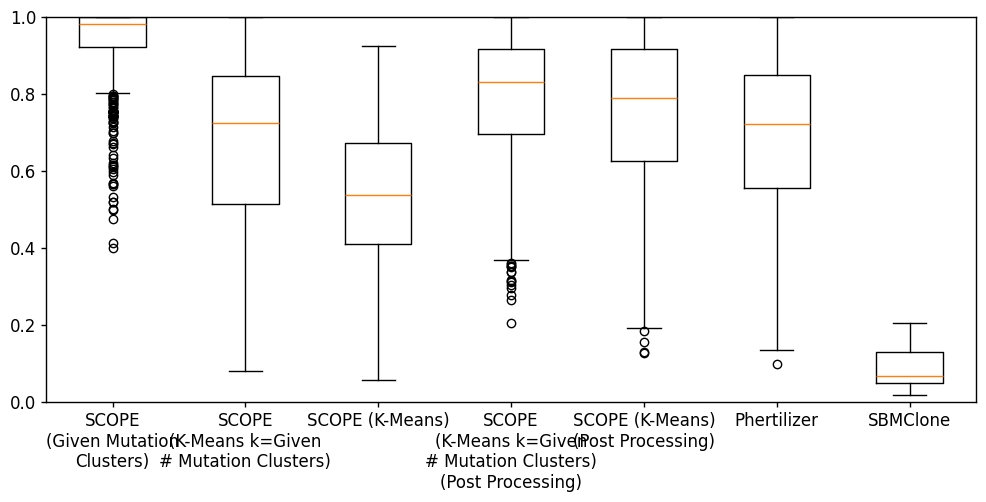

In [66]:
plt.figure(figsize=(12, 5))
plt.boxplot(
    [
        common_results['accuracy_given_clusters'], 
        common_results['accuracy_given_k_kmeans'], 
        common_results['accuracy_kmeans'],
        common_results['accuracy_given_k_kmeans_post'], 
        common_results['accuracy_kmeans_post'], 
        common_results['accuracy_phertilizer'],
        common_results['accuracy_sbmclone']
    ],
    tick_labels=[
        'SCOPE\n(Given Mutation\nClusters)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)', 
        'SCOPE (K-Means)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)\n(Post Processing)', 
        'SCOPE (K-Means)\n(Post Processing)', 
        'Phertilizer',
        'SBMClone',
    ]
)

plt.ylim(0, 1)

plt.show()

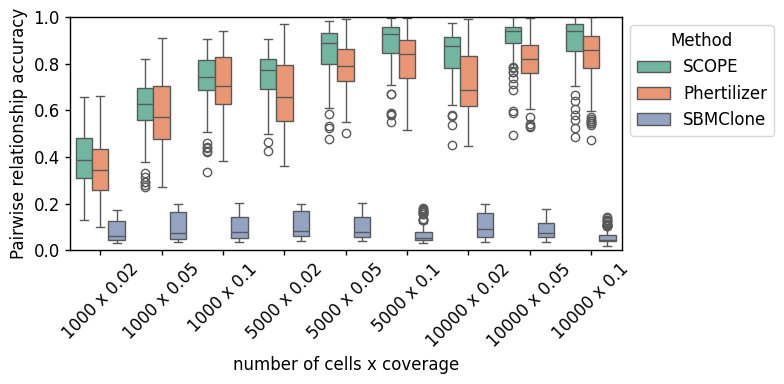

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: select relevant accuracy columns
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

# Step 2: reshape (melt) the DataFrame
df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

# Step 3: make nicer method names (optional)
df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})

# Step 4: convert to categorical for clean axis ordering
df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

# Step 5A: grouped boxplot by ncells
# plt.figure(figsize=(10, 6))
# sns.boxplot(
#     data=df_melted,
#     x="ncells",
#     y="accuracy",
#     hue="method",
#     palette="Set2"
# )
# plt.title("Accuracy comparison by ncells")
# plt.xlabel("Number of Cells")
# plt.ylabel("Accuracy")
# plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


# Step 5B: boxplots faceted by coverage
# sns.catplot(
#     data=df_melted,
#     x="ncells",
#     y="accuracy",
#     hue="method",
#     col="coverage",
#     kind="box",
#     palette="Set2",
#     col_wrap=2,
#     height=4,
#     aspect=1.2
# )
# plt.subplots_adjust(top=0.85)
# plt.suptitle("Accuracy comparison across ncells and coverage")
# plt.show()


# Step 5C (optional): single grouped axis combining ncells + coverage
df_melted["group"] = df_melted["ncells"] + " x " + df_melted["coverage"]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette="Set2"
)
# plt.title("Pairwise ancestry accuracy (by ncells and coverage)")
plt.xlabel("number of cells x coverage")
plt.ylabel("Pairwise relationship accuracy")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


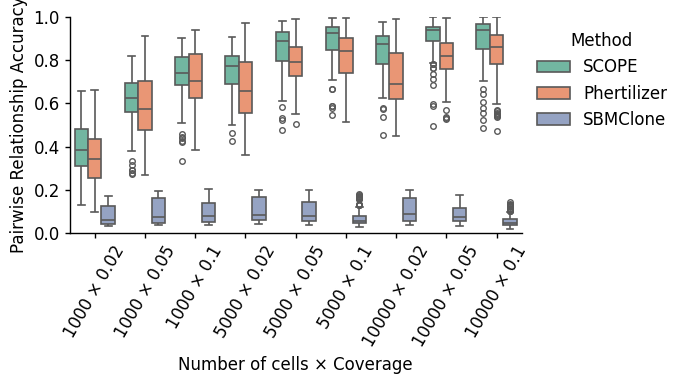

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # optional for color palettes

# Example: using your melted DataFrame df_melted
# Make a group column combining ncells and coverage
df_melted["group"] = df_melted["ncells"] + " × " + df_melted["coverage"]

# Choose a clean color palette
palette = sns.color_palette("Set2", n_colors=df_melted["method"].nunique())

# Set global font sizes (Nature-style)
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})

fig, ax = plt.subplots(figsize=(7, 4))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("Pairwise Relationship Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../data/simulation/pairwise_ancestral_accuracy.svg")
plt.show()


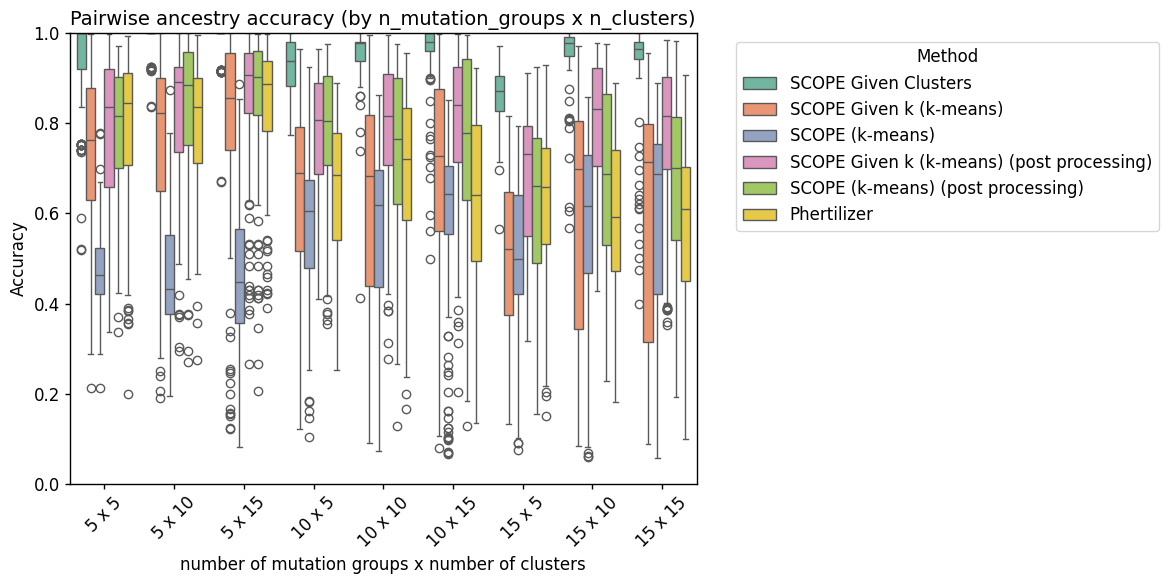

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: select relevant accuracy columns
accuracy_cols = [
    "accuracy_given_clusters",
    "accuracy_given_k_kmeans",
    "accuracy_kmeans",
    "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer"
]

# Step 2: reshape (melt) the DataFrame
df_melted = common_results.melt(
    id_vars=["n_mutation_groups", "n_clusters"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

# Step 3: make nicer method names (optional)
df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_phertilizer": "Phertilizer"
})


# Step 4: convert to categorical for clean axis ordering
df_melted["n_mutation_groups"] = df_melted["n_mutation_groups"].astype(str)
df_melted["n_clusters"] = df_melted["n_clusters"].astype(str)

# Step 5C (optional): single grouped axis combining ncells + coverage
df_melted["group"] = df_melted["n_mutation_groups"] + " x " + df_melted["n_clusters"]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette="Set2"
)
plt.title("Pairwise ancestry accuracy (by n_mutation_groups x n_clusters)")
plt.xlabel("number of mutation groups x number of clusters")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [19]:
results_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post
0,1000,5,100,0.02,5,0,1.000000,None,0.212072,None,0.212072,None,0.471196,None,0.337140,None,0.337140,None
1,1000,5,100,0.02,5,1,0.519609,None,0.476092,None,0.476092,None,0.201482,None,0.476092,None,0.476092,None
2,1000,5,100,0.02,5,2,1.000000,None,0.383371,None,0.476761,None,0.419830,None,0.493112,None,0.476761,None
3,1000,5,100,0.02,5,3,1.000000,None,0.656200,None,0.656200,None,0.357015,None,0.656200,None,0.656200,None
4,1000,5,100,0.02,5,4,1.000000,None,0.570083,None,0.570083,None,0.355103,None,0.570083,None,0.570083,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,0.975026,None,0.955746,None,0.740449,None,0.755052,None,0.978902,None,0.740449,None
1211,10000,15,1000,0.10,15,1,0.962534,None,0.804437,None,0.884497,None,NaN,[Errno 2] No such file or directory: '../data/...,0.896660,None,0.966077,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.797396,None,0.861144,None,0.802605,None,0.898885,None,0.973787,None
1213,10000,15,1000,0.10,15,3,0.991226,None,0.905604,None,0.708512,None,0.870907,None,0.965933,None,0.708512,None


In [144]:
plt.boxplot([results_df[~results_df['accuracy'].isna()]['accuracy']], tick_labels=['SCOPE when mutation clusters numbers are given'])
plt.title('Pairwise ancestral accuracy')
plt.ylim((0, 1))
plt.show()

KeyError: 'accuracy'

In [ ]:
results_df.to_csv("../data/simulation/results/scope_known_mut_clusters_pairwise_ancestral_accuracy.csv")

In [3]:
import glob

# Path pattern
pattern = "/home/saminrk/workspace/scWGS-Tumor-Phylogeny/data/simulation/scope_output_kmeans/*/summary.txt"

# Get all matching files
files = glob.glob(pattern)

count = 0
total = len(files)

for file in files:
    with open(file, "r") as f:
        content = f.read()
        if "#UNIQUE SOLUTIONS: 0" in content:
            count += 1

print(f"Total summary files: {total}")
print(f"Files with '#UNIQUE SOLUTIONS: 0': {count}")
print(f"Fraction: {count}/{total} = {count/total:.2%}")


Total summary files: 1215
Files with '#UNIQUE SOLUTIONS: 0': 1
Fraction: 1/1215 = 0.08%


In [24]:
SIMULATION_STR = 'n5000_m15_size500_cov0.05_p10_s1'

GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output_kmeans/{SIMULATION_STR}"
SCOPE_INPUT_DIR = f"../data/simulation/scope_input_kmeans/{SIMULATION_STR}"



In [25]:
ground_truth_mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
ground_truth_mutation_group.set_index('mutation', inplace=True)
ground_truth_mutation_group

,mutation_group
mutation,
0,11
1,7
2,12
3,5
4,3
...,...
7562,14
7563,5
7564,10


In [26]:
methods_mutation_group = pd.read_csv(f"{SCOPE_INPUT_DIR}/kmeans_clones.csv", index_col=0)
methods_mutation_group["mutation"] = methods_mutation_group["mutation"].str[1:].astype(int)
methods_mutation_group.set_index("mutation", inplace=True)
methods_mutation_group

,mutation_group
mutation,
0,0
1,2
2,5
3,4
4,1
...,...
7562,0
7563,4
7564,0


In [27]:
merged_mutation_group = pd.merge(ground_truth_mutation_group, methods_mutation_group, how='left', on='mutation', suffixes=['_ground_truth', '_method'])
merged_mutation_group

,mutation_group_ground_truth,mutation_group_method
mutation,,
0,11,0
1,7,2
2,12,5
3,5,4
4,3,1
...,...,...
7562,14,0
7563,5,4
7564,10,0


In [28]:
mutation_group_pair_counts = merged_mutation_group.value_counts(['mutation_group_ground_truth', 'mutation_group_method']).reset_index(name='mutation_counts')
mutation_group_pair_counts

,mutation_group_ground_truth,mutation_group_method,mutation_counts
0,10,0,555
1,12,5,544
2,7,2,532
3,5,4,528
4,9,0,504
5,13,0,502
6,4,6,491
7,6,4,484
8,11,0,481
9,0,7,463


In [47]:
mutation_group_pair_counts['mutation_counts'].sum()

np.int64(7567)

In [29]:
total_ground_truth_mutation_groups = int(ground_truth_mutation_group['mutation_group'].max()) + 1
total_methods_mutation_groups = int(methods_mutation_group['mutation_group'].max()) + 1
total_mutations = int(ground_truth_mutation_group.index.max()) + 1

total_mutations, total_ground_truth_mutation_groups, total_methods_mutation_groups

(7567, 15, 8)

In [30]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree_mut = Tree[~Tree[1].str.startswith('s')]
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)

In [31]:
B_mat = pd.read_csv(f"../data/simulation/scope_output_kmeans/{SIMULATION_STR}/solution_0/B.csv", index_col=0)
solT, _ = generate_perfect_phylogeny(B_mat)

In [32]:
us = []; vs = []; rels = []

for i in range(total_ground_truth_mutation_groups):
    for j in range(total_ground_truth_mutation_groups):
        us.append(i)
        vs.append(j)
        if i == j: rels.append(1)
        elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rels.append(3)
        elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rels.append(4)
        else: rels.append(2)

ground_truth_ancestry = pd.DataFrame({ 'u1': us, 'v1': vs, 'rel1': rels })
ground_truth_ancestry


,u1,v1,rel1
0,0,0,1
1,0,1,3
2,0,2,3
3,0,3,3
4,0,4,3
...,...,...,...
220,14,10,2
221,14,11,2
222,14,12,4
223,14,13,2


In [33]:
us = []; vs = []; rels = []

for i in range(total_methods_mutation_groups):
    for j in range(total_methods_mutation_groups):
        us.append(i)
        vs.append(j)
        if i == j: rels.append(1)
        elif nx.has_path(solT, str(i), str(j)): rels.append(3)
        elif nx.has_path(solT, str(j), str(i)): rels.append(4)
        else: rels.append(2)

methods_ancestry = pd.DataFrame({ 'u2': us, 'v2': vs, 'rel2': rels })
methods_ancestry

,u2,v2,rel2
0,0,0,1
1,0,1,4
2,0,2,2
3,0,3,4
4,0,4,2
...,...,...,...
59,7,3,3
60,7,4,3
61,7,5,3
62,7,6,3


In [34]:
merged_ancestry = pd.merge(ground_truth_ancestry, methods_ancestry, how='cross')
merged_ancestry

,u1,v1,rel1,u2,v2,rel2
0,0,0,1,0,0,1
1,0,0,1,0,1,4
2,0,0,1,0,2,2
3,0,0,1,0,3,4
4,0,0,1,0,4,2
...,...,...,...,...,...,...
14395,14,14,1,7,3,3
14396,14,14,1,7,4,3
14397,14,14,1,7,5,3
14398,14,14,1,7,6,3


In [50]:
calc = pd.merge(merged_ancestry, mutation_group_pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
calc.rename(columns={'mutation_counts': 'u1u2'}, inplace=True)
calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
calc = pd.merge(calc, mutation_group_pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group_ground_truth', 'mutation_group_method'], how='left')
calc.rename(columns={'mutation_counts': 'v1v2'}, inplace=True)
calc.drop(columns=['mutation_group_ground_truth', 'mutation_group_method'], inplace=True)
calc['u1u2'] = calc['u1u2'].fillna(0)
calc['v1v2'] = calc['v1v2'].fillna(0)

calc['ground_truth_pair'] = calc.apply(lambda x: tuple(sorted([int(x['u1']), int(x['v1'])])), axis=1)
calc['method_pair'] = calc.apply(lambda x: tuple(sorted([int(x['u2']), int(x['v2'])])), axis=1)
calc = calc.drop_duplicates(subset=['ground_truth_pair', 'method_pair'])

calc['prod'] = calc['u1u2'] * calc['v1v2']
calc['match'] = (calc['rel1'] == calc['rel2']).astype(int)

calc

,u1,v1,rel1,u2,v2,rel2,u1u2,v1v2,ground_truth_pair,method_pair,prod,match
0,0,0,1,0,0,1,0.0,0.0,"(0, 0)","(0, 0)",0.0,1
1,0,0,1,0,1,4,0.0,6.0,"(0, 0)","(0, 1)",0.0,0
2,0,0,1,0,2,2,0.0,0.0,"(0, 0)","(0, 2)",0.0,0
3,0,0,1,0,3,4,0.0,24.0,"(0, 0)","(0, 3)",0.0,0
4,0,0,1,0,4,2,0.0,0.0,"(0, 0)","(0, 4)",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14382,14,14,1,5,6,4,395.0,0.0,"(14, 14)","(5, 6)",0.0,0
14383,14,14,1,5,7,4,395.0,0.0,"(14, 14)","(5, 7)",0.0,0
14390,14,14,1,6,6,1,0.0,0.0,"(14, 14)","(6, 6)",0.0,1
14391,14,14,1,6,7,4,0.0,0.0,"(14, 14)","(6, 7)",0.0,0


In [51]:
(calc['u1u2'] * calc['v1v2']).sum()

np.float64(14244782.0)

In [46]:
calc[(calc['ground_truth_pair'] == (0, 0)) & (calc['method_pair'] == (1, 3))]

,u1,v1,rel1,u2,v2,rel2,u1u2,v1v2,ground_truth_pair,method_pair,prod,match
11,0,0,1,1,3,4,6.0,24.0,"(0, 0)","(1, 3)",144.0,0
25,0,0,1,3,1,3,24.0,6.0,"(0, 0)","(1, 3)",144.0,0


In [40]:
total = calc['prod'].sum()
correct = (calc['match'] * calc['prod']).sum()

total, correct, correct / total

(np.float64(14244782.0),
 np.float64(11241215.0),
 np.float64(0.7891461589233166))

In [ ]:
print(total_mutations)
print( (total_mutations * (total_mutations - 1)) // 2 )

7567
28625961


In [107]:
import os

base_path = "../data/simulation/phertilizer_output"

folders = [
    name
    for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name))
]

print(folders)

['n10000_m15_size1000_cov0.02_p15_s2', 'n1000_m10_size100_cov0.02_p5_s4', 'n1000_m10_size100_cov0.02_p5_s0', 'n1000_m15_size100_cov0.1_p5_s3', 'n10000_m5_size1000_cov0.1_p15_s2', 'n1000_m5_size500_cov0.1_p5_s3', 'n5000_m15_size500_cov0.05_p10_s3', 'n1000_m5_size1000_cov0.05_p15_s4', 'n5000_m15_size100_cov0.05_p15_s3', 'n5000_m15_size500_cov0.02_p5_s1', 'n5000_m15_size100_cov0.02_p5_s3', 'n5000_m15_size100_cov0.1_p15_s1', 'n5000_m10_size100_cov0.02_p10_s3', 'n1000_m10_size100_cov0.1_p5_s3', 'n1000_m5_size500_cov0.02_p5_s0', 'n1000_m15_size1000_cov0.1_p15_s0', 'n1000_m5_size100_cov0.05_p15_s1', 'n5000_m15_size100_cov0.05_p10_s2', 'n5000_m10_size500_cov0.1_p15_s2', 'n5000_m15_size500_cov0.1_p10_s1', 'n5000_m5_size100_cov0.1_p15_s1', 'n10000_m15_size1000_cov0.1_p10_s2', 'n1000_m15_size100_cov0.02_p15_s1', 'n1000_m15_size100_cov0.05_p5_s2', 'n10000_m10_size500_cov0.02_p10_s3', 'n1000_m15_size500_cov0.05_p15_s1', 'n1000_m10_size500_cov0.02_p15_s1', 'n5000_m15_size500_cov0.02_p15_s4', 'n5000_

In [108]:
scope_accs = []
phert_accs = []

for SIMULATION_STR in folders:
    try:
        scope_acc, phert_acc = res(SIMULATION_STR)
        scope_accs.append(scope_acc)
        phert_accs.append(phert_acc)
    except Exception as e:
        print(e)



[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n10000_m15_size1000_cov0.02_p15_s2/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n10000_m5_size1000_cov0.1_p15_s2/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n5000_m15_size500_cov0.05_p10_s3/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n5000_m10_size500_cov0.1_p15_s2/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n10000_m15_size1000_cov0.1_p10_s2/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/scope_output/n1000_m15_size100_cov0.02_p15_s1/solution_0/B.csv'
[Errno 2] No such file or directory: '../data/simulation/phertilizer_output/n10000_m10_size500_cov0.02_p10_s3/snv_clusters.csv'
[Errno 2] No such file or directory: '../data/simulation/scope_output/n1000_m10_size500_cov0.02_p15_s1/solution_0/

In [110]:
len(phert_accs), len(scope_accs)

(582, 582)

/localscratch-nvme/186223/ipykernel_753026/2871768935.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([phert_accs, scope_accs], labels=['Phertilizer', 'SCOPE given mut clusters'])


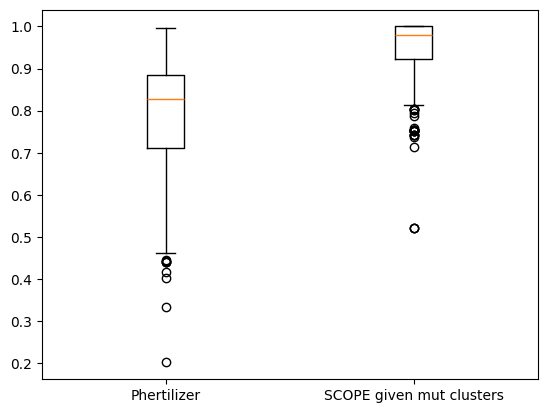

In [116]:
plt.boxplot([phert_accs, scope_accs], labels=['Phertilizer', 'SCOPE given mut clusters'])

plt.show()

In [119]:
mutation_to_group = mutation_group["mutation_group"].to_numpy()

mutation_ancestral_relation = mutation_group_ancestral_relation[mutation_to_group[:, None], mutation_to_group[None, :]]

mutation_ancestral_relation

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]], shape=(15255, 15255))

In [120]:
mutation_ancestral_relation.T

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], shape=(15255, 15255))

In [121]:
same_group = mutation_to_group[:, None] == mutation_to_group[None, :]
same_group.astype(int)

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(15255, 15255))

In [22]:
!ls "../data/simulation/phertilizer_output/n5000_m5_size1000_cov0.1_p15_s0"

benchmark	   err.log  snv_clusters.csv  tree.txt
cell_clusters.csv  log	    tree.png


In [23]:
!cat "../data/simulation/phertilizer_output/n5000_m5_size1000_cov0.1_p15_s0/tree.txt"

8 #edges
0 1
1 2
2 3
2 6
3 4
3 5
6 7
6 8
4 #leaves
4
5
7
8


In [29]:
T_phert.edges

OutEdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (3, 11), (4, 5), (11, 12), (5, 6), (12, 13), (12, 18), (6, 7), (6, 8), (13, 14), (13, 15), (18, 19), (8, 9), (8, 10), (15, 16), (15, 17), (19, 20), (19, 21)])

In [147]:
mutation_group_ancestral_relation_pred = np.zeros((total_mutation_groups_pred, total_mutation_groups_pred))

for i in range(total_mutation_groups_pred):
    for j in range(total_mutation_groups_pred):
        if i == j: continue
        if nx.has_path(T_phert, i, j):
            mutation_group_ancestral_relation_pred[i][j] = 1

mutation_group_ancestral_relation_pred

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [123]:
def form_mutation_ancestry(mutation_group, mutation_group_ancestral_relation):
    mutation_to_group = mutation_group["cluster"].to_numpy()
    mutation_ancestral_relation = mutation_group_ancestral_relation[mutation_to_group[:, None], mutation_to_group[None, :]]
    same_group = (mutation_to_group[:, None] == mutation_to_group[None, :]).astype(int)

    indices = mutation_group.index

    Ap = np.zeros((total_mutations, total_mutations))
    Ap[np.ix_(indices, indices)] = mutation_ancestral_relation

    Sp = np.zeros((total_mutations, total_mutations))
    Sp[np.ix_(indices, indices)] = same_group

    
    return Ap, Ap.T, Sp

In [124]:
Ap, Apt, Sp = form_mutation_ancestry(df_snv_clusters, mutation_group_ancestral_relation_pred)

In [125]:
Ap.shape

(15255, 15255)

In [127]:
mutation_ancestral_relation = np.triu(mutation_ancestral_relation)
same_group = np.triu(same_group)

In [130]:
mutation_ancestral_relation.shape

(15255, 15255)

In [ ]:
Apm = Ap[mutation_ancestral_relation == 1]
Apm

array([1., 0., 1., ..., 1., 1., 1.], shape=(30065451,))

In [18]:
mutation_ancestral_relation = np.zeros((total_mutations, total_mutations))

## 0: same mutation, 1: same mutation group, 2: i -> j, 3: j -> i, 4 -> disjoint

for i in range(total_mutations):
    for j in range(total_mutations):

        if i == j: continue

        mutation_group_i = mutation_group.loc[i, 'mutation_group']
        mutation_group_j = mutation_group.loc[i, 'mutation_group']

        if mutation_group_i == mutation_group_j:
            mutation_ancestral_relation[i][j] = 1
            continue

        if nx.has_path(T_truth, f'c{i}', f'c{j}'):
            mutation_ancestral_relation[i][j] = 2
            continue

        if nx.has_path(T_truth, f'c{j}', f'c{i}'):
            mutation_ancestral_relation[i][j] = 3
            continue

        mutation_ancestral_relation[i][j] = 4


mutation_ancestral_relation

KeyboardInterrupt: 

In [ ]:
pd.read

# Cluster Assignment Accuracy

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys
sys.path.append("..")

In [33]:
import pandas as pd
import numpy as np
import networkx as nx

In [34]:
from src.phylogeny_utils import *

In [36]:
import networkx as nx

def nearest_d_or_root_for_c_nodes(G, root):
    result = {}

    for cnode in [n for n in G.nodes if str(n).startswith('c')]:

        current = cnode
        ancestor = None

        while current != root:
            preds = list(G.predecessors(current)) if G.is_directed() else [
                n for n in G.neighbors(current) if nx.shortest_path_length(G, root, n) < nx.shortest_path_length(G, root, current)
            ]
            if not preds:
                break
            parent = preds[0]

            if str(parent).startswith('d'):
                ancestor = parent
                break

            current = parent

        if ancestor is None:
            ancestor = root

        result[cnode] = ancestor

    return result


In [37]:
import networkx as nx

def nearest_CN_or_root_for_nodes(G, root):
    result = {}

    for cnode in [n for n in G.nodes if isinstance(n, (int, np.integer))]:

        current = cnode
        ancestor = None

        while current != root:
            preds = list(G.predecessors(current)) if G.is_directed() else [
                n for n in G.neighbors(current) if nx.shortest_path_length(G, root, n) < nx.shortest_path_length(G, root, current)
            ]
            if not preds:
                break
            parent = preds[0]

            if str(parent).startswith('CN_'):
                ancestor = parent
                break

            current = parent

        if ancestor is None:
            ancestor = root

        result[cnode] = ancestor

    return result


In [38]:
STR = "n1000_m5_size1000_cov0.1_p10_s3"

def cluster_placement_accuracy(STR, type="GIVEN_CLUSTERING"):

    if type == "GIVEN_CLUSTERING":
        GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
        SCOPE_OUT_DIR = f"../data/simulation/scope_output/{STR}"
        SCOPE_IN_DIR = f"../data/simulation/scope_input/{STR}"
    elif type == "KMEANS_GIVEN_K":
        GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
        SCOPE_OUT_DIR = f"../data/simulation/scope_output_kmeans_known_k/{STR}"
        SCOPE_IN_DIR = f"../data/simulation/scope_input_kmeans_known_k/{STR}"
    elif type == "KMEANS":
        GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
        SCOPE_OUT_DIR = f"../data/simulation/scope_output_kmeans/{STR}"
        SCOPE_IN_DIR = f"../data/simulation/scope_input_kmeans/{STR}"
    elif type == "KMEANS_GIVEN_K_POST":
        GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
        SCOPE_OUT_DIR = f"../data/simulation/scope_output_kmeans_known_k/{STR}"
        SCOPE_IN_DIR = f"../data/simulation/scope_post_kmeans_known_k/{STR}"
    elif type == "KMEANS_POST":
        GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
        SCOPE_OUT_DIR = f"../data/simulation/scope_output_kmeans/{STR}"
        SCOPE_IN_DIR = f"../data/simulation/scope_post_kmeans/{STR}"
    else:
        raise ValueError(f"type unknown {type}")

    df_mut_mut_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    cluster_map = nearest_d_or_root_for_c_nodes(T_truth, 'root')

    cluster_df = pd.DataFrame(list(cluster_map.items()), columns=['mutation_group', 'cn_cluster'])
    cluster_df['cn_cluster'] = cluster_df['cn_cluster'].replace('root', 'd0')
    cluster_df['mutation_group'] = cluster_df['mutation_group'].str[1:].astype(int)
    cluster_df['cn_cluster'] = cluster_df['cn_cluster'].str[1:].astype(int)

    df_mut_cn_cluster = pd.merge(df_mut_mut_group, cluster_df, on='mutation_group', how='left')

    B = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/B.csv", index_col=0)
    X = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/X.csv", index_col=0)
    G = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/G.csv", index_col=0)
    G.columns = G.columns.astype(int)
    B.columns = B.columns.astype(int)
    X.index = X.index.astype(int)

    solT_mut, _ = generate_perfect_phylogeny(B)
    fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)

    cluster_map_pred = nearest_CN_or_root_for_nodes(fixed_T, 'root')

    cluster_df_pred = pd.DataFrame(list(cluster_map_pred.items()), columns=['mutation_group', 'cn_cluster'])
    cluster_df_pred['cn_cluster'] = cluster_df_pred['cn_cluster'].str[3:].map(lambda x: ord(x) - ord('A'))

    if type == "GIVEN_CLUSTERING":
        df_mut_mut_group_pred = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
    else:
        FILE_NAME = "kmeans_clones"
        if type[-4:] == "POST": FILE_NAME = "kmeans_cleaned_clones" 
        df_mut_mut_group_pred = pd.read_csv(f"{SCOPE_IN_DIR}/{FILE_NAME}.csv", index_col=0)
        df_mut_mut_group_pred['mutation'] = df_mut_mut_group_pred['mutation'].str[1:].astype(int)
    
    df_mut_cn_cluster_pred = pd.merge(df_mut_mut_group_pred, cluster_df_pred, on='mutation_group', how='left')

    df_merged = pd.merge(df_mut_cn_cluster, df_mut_cn_cluster_pred, on='mutation', how='left', suffixes=['_ground_truth', '_method'])
    df_merged['cn_cluster_method'].fillna(-1)
    df_merged['match'] = (df_merged['cn_cluster_ground_truth'] == df_merged['cn_cluster_method']).astype(int)

    total = int(len(df_merged))
    correct = int(df_merged['match'].sum())
    accuracy = correct / total

    return total, correct, accuracy

cluster_placement_accuracy(STR), cluster_placement_accuracy(STR, "KMEANS_GIVEN_K"), cluster_placement_accuracy(STR, "KMEANS"), cluster_placement_accuracy(STR, "KMEANS_GIVEN_K_POST"), cluster_placement_accuracy(STR, "KMEANS_POST")

((4999, 4999, 1.0),
 (4999, 3975, 0.7951590318063613),
 (4999, 2929, 0.5859171834366873),
 (4999, 3975, 0.7951590318063613),
 (4999, 3833, 0.7667533506701341))

In [39]:
results_given_cluster_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "GIVEN_CLUSTERING"))

In [40]:
results_given_k_kmeans_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_GIVEN_K"))

In [41]:
results_kmeans_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS"))

In [42]:
results_given_k_kmeans_post_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_GIVEN_K_POST"))

In [43]:
results_kmeans_post_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_POST"))

In [44]:
results_phertilizer_df = make_results_df(cluster_placement_accuracy_phertilizer)

/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true
/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encounte

In [46]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in results_given_cluster_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(results_given_cluster_df, results_given_k_kmeans_df, on=merge_on, suffixes=['_given_clusters', '_given_k_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, results_kmeans_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_kmeans', 'error': 'error_kmeans'}, inplace=True)
results_df_3 = pd.merge(results_df_2, results_phertilizer_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_4 = pd.merge(results_df_3, results_given_k_kmeans_post_df, on=merge_on, how='left')
results_df_4.rename(columns={'accuracy': 'accuracy_given_k_kmeans_post', 'error': 'error_given_k_kmeans_post'}, inplace=True)
results_df_5 = pd.merge(results_df_4, results_kmeans_post_df, on=merge_on, how='left')
results_df_5.rename(columns={'accuracy': 'accuracy_kmeans_post', 'error': 'error_kmeans_post'}, inplace=True)

results_df = results_df_5

['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [47]:
common_results = results_df.dropna(
    subset=['accuracy_given_clusters', 'accuracy_given_k_kmeans', 'accuracy_kmeans',
     'accuracy_phertilizer'
    ]
)
common_results

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post
2,1000,5,100,0.02,5,2,0.562500,None,0.166016,None,0.603516,None,0.182813,None,0.166016,None,0.603516,None
4,1000,5,100,0.02,5,4,0.604207,None,0.663480,None,0.663480,None,0.187763,None,0.663480,None,0.663480,None
6,1000,5,100,0.02,10,1,0.000000,None,0.000000,None,0.000000,None,0.097860,None,0.000000,None,0.000000,None
8,1000,5,100,0.02,10,3,0.182365,None,0.360721,None,0.360721,None,0.091182,None,0.360721,None,0.360721,None
9,1000,5,100,0.02,10,4,0.168750,None,0.243750,None,0.243750,None,0.092292,None,0.516667,None,0.516667,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,1.000000,None,0.867630,None,0.459613,None,0.355705,None,0.902028,None,0.459613,None
1210,10000,15,1000,0.10,15,0,1.000000,None,0.980027,None,0.198739,None,0.259502,None,0.991772,None,0.198739,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.862209,None,0.932547,None,0.402458,None,0.917207,None,0.992593,None
1213,10000,15,1000,0.10,15,3,1.000000,None,0.885670,None,0.600282,None,0.370135,None,0.916387,None,0.600282,None


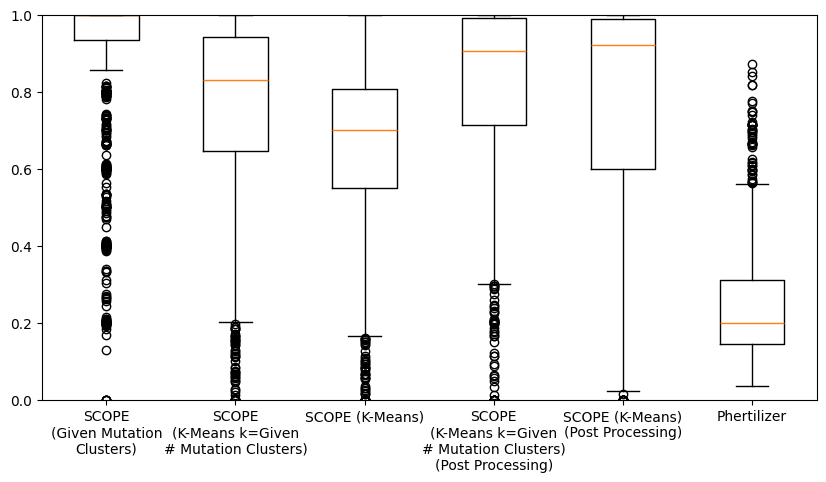

In [48]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [
        common_results['accuracy_given_clusters'], 
        common_results['accuracy_given_k_kmeans'], 
        common_results['accuracy_kmeans'],
        common_results['accuracy_given_k_kmeans_post'], 
        common_results['accuracy_kmeans_post'], 
        common_results['accuracy_phertilizer']
    ],
    tick_labels=[
        'SCOPE\n(Given Mutation\nClusters)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)', 
        'SCOPE (K-Means)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)\n(Post Processing)', 
        'SCOPE (K-Means)\n(Post Processing)', 
        'Phertilizer'
    ]
)

plt.ylim(0, 1)

plt.show()

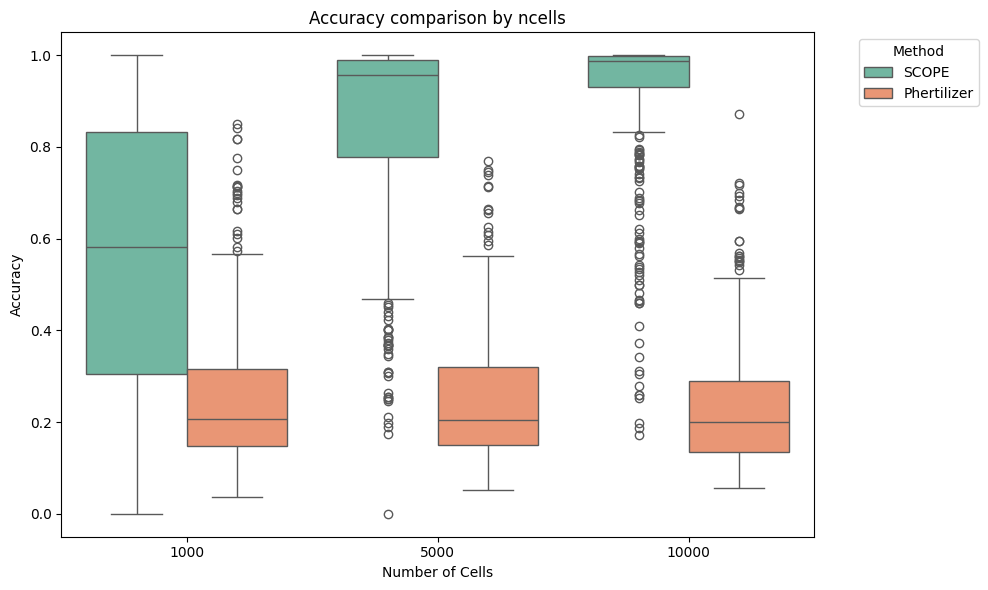

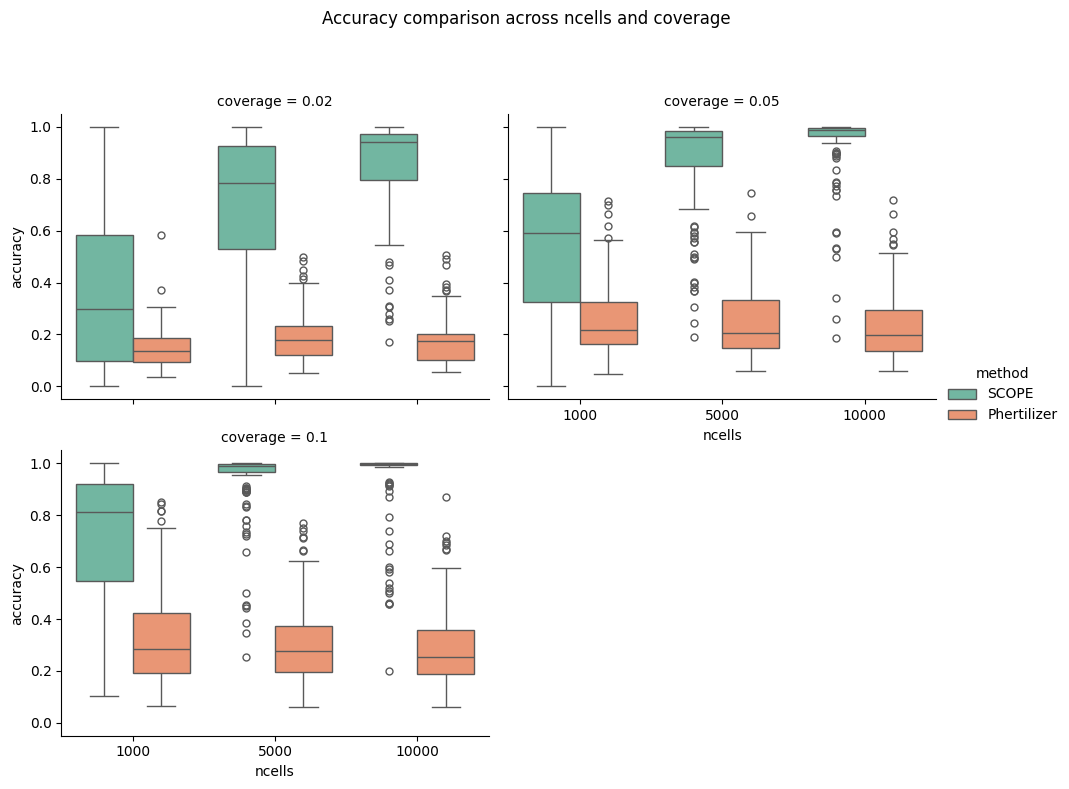

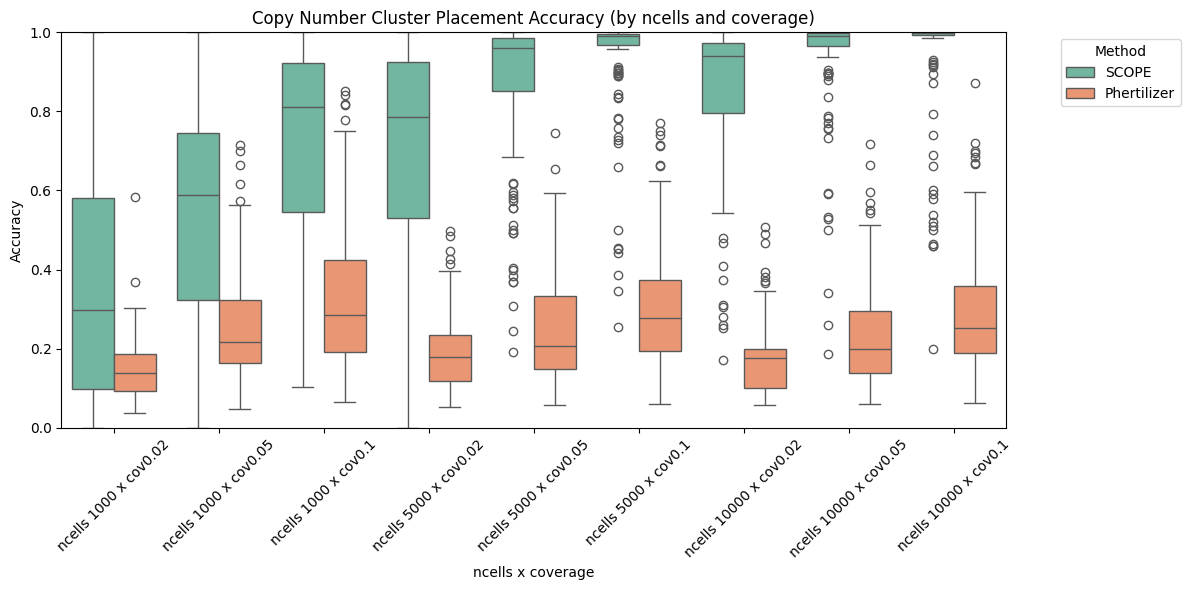

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: select relevant accuracy columns
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer"
]

# Step 2: reshape (melt) the DataFrame
df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

# Step 3: make nicer method names (optional)
df_melted["method"] = df_melted["method"].replace({
    # "accuracy_given_clusters": "SCOPE Given Clusters",
    # "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    # "accuracy_kmeans": "SCOPE (k-means)",
    # "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer"
})

# Step 4: convert to categorical for clean axis ordering
df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

# Step 5A: grouped boxplot by ncells
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_melted,
    x="ncells",
    y="accuracy",
    hue="method",
    palette="Set2"
)
plt.title("Accuracy comparison by ncells")
plt.xlabel("Number of Cells")
plt.ylabel("Accuracy")
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Step 5B: boxplots faceted by coverage
sns.catplot(
    data=df_melted,
    x="ncells",
    y="accuracy",
    hue="method",
    col="coverage",
    kind="box",
    palette="Set2",
    col_wrap=2,
    height=4,
    aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Accuracy comparison across ncells and coverage")
plt.show()


# Step 5C (optional): single grouped axis combining ncells + coverage
df_melted["group"] = "ncells " + df_melted["ncells"] + " x cov" + df_melted["coverage"]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette="Set2"
)
plt.title("Copy Number Cluster Placement Accuracy (by ncells and coverage)")
plt.xlabel("ncells x coverage")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


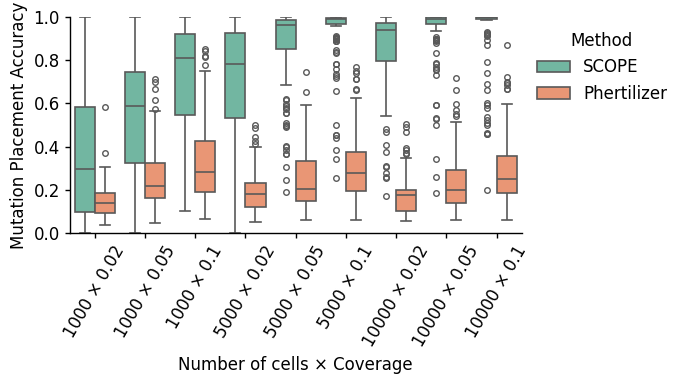

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # optional for color palettes

# Example: using your melted DataFrame df_melted
# Make a group column combining ncells and coverage
df_melted["group"] = df_melted["ncells"] + " × " + df_melted["coverage"]

# Choose a clean color palette
palette = sns.color_palette("Set2", n_colors=df_melted["method"].nunique())

# Set global font sizes (Nature-style)
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})

fig, ax = plt.subplots(figsize=(7, 4))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("Mutation Placement Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../data/simulation/cluster_placement_accuracy.svg")
plt.show()


In [8]:
STR = "n1000_m5_size1000_cov0.1_p10_s3"

In [9]:
GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
SCOPE_OUT_DIR = f"../data/simulation/scope_output_kmeans/{STR}"
SCOPE_IN_DIR = f"../data/simulation/scope_input_kmeans/{STR}"

In [10]:
df_mut_mut_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
df_mut_mut_group

,mutation,mutation_group
0,0,1
1,1,3
2,2,3
3,3,2
4,4,3
...,...,...
4994,4994,4
4995,4995,3
4996,4996,2
4997,4997,0


In [11]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree_mut = Tree[~Tree[1].str.startswith('s')]
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)

T_truth.edges


OutEdgeView([('root', 'd1'), ('root', 'c0'), ('d1', 'c2'), ('c0', 'c1'), ('c0', 'd6'), ('c2', 'd2'), ('c2', 'd3'), ('c1', 'd4'), ('d4', 'c3'), ('c3', 'd5'), ('c3', 'd9'), ('d5', 'c4'), ('c4', 'd7'), ('c4', 'd8')])

In [12]:
cluster_map = nearest_d_or_root_for_c_nodes(T_truth, 'root')
cluster_map

{'c0': 'root', 'c2': 'd1', 'c1': 'root', 'c3': 'd4', 'c4': 'd5'}

In [13]:
cluster_df = pd.DataFrame(list(cluster_map.items()), columns=['mutation_group', 'cn_cluster'])
cluster_df['cn_cluster'] = cluster_df['cn_cluster'].replace('root', 'd0')
cluster_df['mutation_group'] = cluster_df['mutation_group'].str[1:].astype(int)
cluster_df['cn_cluster'] = cluster_df['cn_cluster'].str[1:].astype(int)

cluster_df

,mutation_group,cn_cluster
0,0,0
1,2,1
2,1,0
3,3,4
4,4,5


In [14]:
df_mut_cn_cluster = pd.merge(df_mut_mut_group, cluster_df, on='mutation_group', how='left')
df_mut_cn_cluster

,mutation,mutation_group,cn_cluster
0,0,1,0
1,1,3,4
2,2,3,4
3,3,2,1
4,4,3,4
...,...,...,...
4994,4994,4,5
4995,4995,3,4
4996,4996,2,1
4997,4997,0,0


In [15]:
B = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/B.csv", index_col=0)
X = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/X.csv", index_col=0)
G = pd.read_csv(f"{SCOPE_OUT_DIR}/solution_0/G.csv", index_col=0)
G.columns = G.columns.astype(int)
B.columns = B.columns.astype(int)
X.index = X.index.astype(int)

B, X, G

(     0         1    2    3    4    5         6    7         8         9    10  \
 0   0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0   
 1   0.0  1.000000  0.0 -0.0  0.0  0.0 -0.000000  0.0  0.000000 -0.000000  0.0   
 2  -0.0 -0.000000  0.0 -0.0 -0.0  0.0  1.000000  0.0  0.000000  0.000000 -0.0   
 3  -0.0 -0.000000  0.0 -0.0 -0.0  0.0  1.000000  0.0 -0.000000  0.000008 -0.0   
 4   0.0  0.999992 -0.0 -0.0 -0.0 -0.0  0.000008  0.0  0.000008  0.999992 -0.0   
 5   0.0  0.999992  0.0 -0.0 -0.0 -0.0  0.000008 -0.0 -0.000000  0.999992 -0.0   
 6   0.0  0.000000 -0.0 -0.0 -0.0 -0.0  1.000000 -0.0 -0.000000 -0.000000 -0.0   
 7   0.0 -0.000000 -0.0 -0.0 -0.0 -0.0  1.000000 -0.0  1.000000 -0.000000 -0.0   
 8  -0.0 -0.000000  1.0 -0.0 -0.0 -0.0  1.000000 -0.0  1.000000 -0.000000 -0.0   
 9   0.0  0.000000  1.0 -0.0 -0.0 -0.0  1.000000 -0.0  1.000000 -0.000000 -0.0   
 10  1.0 -0.000000  1.0 -0.0 -0.0 -0.0  1.000000 -0.0  1.000000 -0.000000 -0.0   
 11  0.0 -0.0000

In [16]:
solT_mut, _ = generate_perfect_phylogeny(B)
fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)

In [17]:
fixed_T.edges

OutEdgeView([('root', 6), ('root', 'CN_B'), (1, 9), (6, 'CN_A'), (9, 16), (9, 'CN_C'), (16, 'CN_D'), (17, 8), (17, 'CN_G'), (8, 'CN_E'), (2, 'CN_F'), (2, 'CN_J'), (13, 0), (13, 4), (0, 'CN_I'), (4, 'CN_H'), ('CN_A', np.int64(17)), ('CN_B', np.int64(1)), ('CN_E', np.int64(2)), ('CN_F', np.int64(13))])

In [18]:
cluster_map_pred = nearest_CN_or_root_for_nodes(fixed_T, 'root')

In [19]:
cluster_df_pred = pd.DataFrame(list(cluster_map_pred.items()), columns=['mutation_group', 'cn_cluster'])
cluster_df_pred['cn_cluster'] = cluster_df_pred['cn_cluster'].str[3:].map(lambda x: ord(x) - ord('A'))

cluster_df_pred

,mutation_group,cn_cluster
0,1,1
1,6,51
2,9,1
3,16,1
4,17,0
5,8,0
6,2,4
7,13,5
8,0,5
9,4,5


In [20]:
cluster_df['mutation_group']

0    0
1    2
2    1
3    3
4    4
Name: mutation_group, dtype: int64

In [21]:
# df_mut_mut_group_pred = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")

df_mut_mut_group_pred = pd.read_csv(f"{SCOPE_IN_DIR}/kmeans_clones.csv", index_col=0)
df_mut_mut_group_pred['mutation'] = df_mut_mut_group_pred['mutation'].str[1:].astype(int)

df_mut_mut_group_pred

,mutation,mutation_group
0,0,8
1,1,11
2,2,5
3,3,1
4,4,2
...,...,...
4994,4994,10
4995,4995,13
4996,4996,9
4997,4997,17


In [22]:
df_mut_cn_cluster_pred = pd.merge(df_mut_mut_group_pred, cluster_df_pred, on='mutation_group', how='left')
df_mut_cn_cluster_pred

,mutation,mutation_group,cn_cluster
0,0,8,0.0
1,1,11,NaN
2,2,5,NaN
3,3,1,1.0
4,4,2,4.0
...,...,...,...
4994,4994,10,NaN
4995,4995,13,5.0
4996,4996,9,1.0
4997,4997,17,0.0


In [23]:
df_merged = pd.merge(df_mut_cn_cluster, df_mut_cn_cluster_pred, on='mutation', how='left', suffixes=['_ground_truth', '_method'])
df_merged['cn_cluster_method'].fillna(-1)
df_merged['match'] = (df_merged['cn_cluster_ground_truth'] == df_merged['cn_cluster_method']).astype(int)

df_merged

,mutation,mutation_group_ground_truth,cn_cluster_ground_truth,mutation_group_method,cn_cluster_method,match
0,0,1,0,8,0.0,1
1,1,3,4,11,NaN,0
2,2,3,4,5,NaN,0
3,3,2,1,1,1.0,1
4,4,3,4,2,4.0,1
...,...,...,...,...,...,...
4994,4994,4,5,10,NaN,0
4995,4995,3,4,13,5.0,0
4996,4996,2,1,9,1.0,1
4997,4997,0,0,17,0.0,1


In [24]:
df_merged['match'].mean()

np.float64(0.5859171834366873)

# Cluster Placement Accuracy of Phertilizer

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
sys.path.append("..")

In [16]:
import pandas as pd
import numpy as np
import networkx as nx

In [17]:
from src.phylogeny_utils import *

In [18]:
# --- Step 4: Define LCA helper ---
def find_lca(T, nodes, depths):
    if not nodes:
        return None
    ancestors_list = [set(nx.ancestors(T, n)).union({n}) for n in nodes]
    common_ancestors = set.intersection(*ancestors_list)
    lca = max(common_ancestors, key=lambda n: depths[n])
    return lca

In [19]:
def compute_distances_to_lcas(T, nodes, lca_nodes):
    import numpy as np
    
    dist_matrix = pd.DataFrame(np.inf, index=nodes, columns=lca_nodes, dtype=float)

    for lca in lca_nodes:
        # Compute shortest path lengths from LCA to all reachable nodes
        lengths = nx.single_source_shortest_path_length(T, lca)
        for node, d in lengths.items():
            if node in nodes:
                dist_matrix.at[node, lca] = d

    return dist_matrix

In [27]:
def cluster_placement_accuracy_phertilizer(STR):
    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
    PHERTILIZER_OUT_DIR = f"../data/simulation/phertilizer_output/{STR}"
    PHERTILIZER_IN_DIR = f"../data/simulation/phertilizer_input/{STR}"

    df_mut_mut_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    Tree_mut = Tree[~Tree[1].str.startswith('s')]
    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)
    
    cluster_map = nearest_d_or_root_for_c_nodes(T_truth, 'root')

    cluster_df = pd.DataFrame(list(cluster_map.items()), columns=['mutation_group', 'cn_cluster'])
    cluster_df['cn_cluster'] = cluster_df['cn_cluster'].replace('root', 'd0')
    cluster_df['mutation_group'] = cluster_df['mutation_group'].str[1:].astype(int)
    cluster_df['cn_cluster'] = cluster_df['cn_cluster'].str[1:].astype(int)

    df_mut_cn_cluster = pd.merge(df_mut_mut_group, cluster_df, on='mutation_group', how='left')

    T_phert = read_phertilizer_tree(f"{PHERTILIZER_OUT_DIR}/tree.txt")

    phertilizer_cell_cluster = pd.read_csv(f"{PHERTILIZER_OUT_DIR}/cell_clusters.csv")

    phertilizer_snv_cluster = pd.read_csv(f"{PHERTILIZER_OUT_DIR}/snv_clusters.csv")
    phertilizer_snv_cluster['mutation'] = phertilizer_snv_cluster['mutation'].str[3:].astype(int)

    ground_truth_cell_cluster = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_character_matrix_without_noise.parquet")
    ground_truth_cell_cluster = ground_truth_cell_cluster.loc[:, 'cluster_id']

    clone_cell_cluster = pd.merge(phertilizer_cell_cluster, ground_truth_cell_cluster, right_index=True, left_on='cell', how='left')
    clone_cell_cluster.rename(columns={'cluster': 'clone'}, inplace=True)

    clone_cluster_counts = (
        clone_cell_cluster.groupby(["clone", "cluster_id"])
        .size()
        .reset_index(name="cell_count")
    )

    clone_totals = clone_cluster_counts.groupby("clone")["cell_count"].transform("sum")
    clone_cluster_counts["proportion"] = clone_cluster_counts["cell_count"] / clone_totals
 
    clone_cluster_filt = clone_cluster_counts[clone_cluster_counts['cell_count'] >= 3]

    n_clusters = int(ground_truth_cell_cluster.max()) + 1
    n_clones_pred = max(int(phertilizer_snv_cluster['cluster'].max()), int(phertilizer_cell_cluster['cluster'].max())) + 1

    start_cluster = np.zeros(shape=(n_clones_pred, n_clusters), dtype=int)

    for _, row in clone_cluster_filt.iterrows():
        start_cluster[int(row["clone"]), int(row["cluster_id"])] = 1

    start_cluster_df = pd.DataFrame(
        start_cluster,
        index=np.arange(n_clones_pred),
        columns=np.arange(n_clusters)
    )

    clones_per_cluster = {
        cluster: list(start_cluster_df.index[start_cluster_df[cluster] > 0])
        for cluster in start_cluster_df.columns
    }

    # --- Step 1: Detect root ---
    root_nodes = [n for n, deg in T_phert.in_degree() if deg == 0]
    if len(root_nodes) != 1:
        raise ValueError(f"Expected a single root, found {len(root_nodes)} nodes with in-degree 0")
    root_node = root_nodes[0]

    # --- Step 2: Compute depths from root ---
    depths = nx.shortest_path_length(T_phert, source=root_node)

    # --- Step 3: Prepare clone -> cluster mapping ---
    clones_per_cluster = {
        cluster: list(start_cluster_df.index[start_cluster_df[cluster] > 0])
        for cluster in start_cluster_df.columns
    }

    # --- Step 4: Define LCA helper ---
    def find_lca(T, nodes, depths):
        if not nodes:
            return None
        ancestors_list = [set(nx.ancestors(T, n)).union({n}) for n in nodes]
        common_ancestors = set.intersection(*ancestors_list)
        lca = max(common_ancestors, key=lambda n: depths[n])
        return lca

    # --- Step 5: Compute LCA per cluster ---
    cluster_lca = {}
    for cluster, clones in clones_per_cluster.items():
        cluster_lca[cluster] = find_lca(T_phert, clones, depths)

    # --- Step 6: Return as DataFrame ---
    lca_df = pd.DataFrame.from_dict(cluster_lca, orient='index', columns=['LCA_clone'])

    dist_df = compute_distances_to_lcas(T_phert, T_phert.nodes(), lca_df['LCA_clone'].unique())

    nearest_lcas = []

    for node in dist_df.index:
        if node in dist_df.columns:
            dist_df.at[node, node] = np.inf

    for idx, row in dist_df.iterrows():
        min_dist = row.min()
        nearest = row.index[row == min_dist][0]
        nearest_lcas.append({'target_node': idx, 'nearest_lcas': nearest})

    nearest_lca_df = pd.DataFrame(nearest_lcas)

    clone_cluster_mat = np.zeros((n_clones_pred, n_clusters), dtype=int)

    for _, row in nearest_lca_df.iterrows():
        node = row['target_node']
        nearest_lca = row['nearest_lcas']

        for i, _ in lca_df[lca_df['LCA_clone'] == nearest_lca].iterrows():
            parent = i
            clone_cluster_mat[node][parent] = 1

    clone_cluster_mat = clone_cluster_mat | start_cluster

    subclonal_df = pd.DataFrame(
        clone_cluster_mat,
        index=np.arange(n_clones_pred),
        columns=np.arange(n_clusters)
    )

    phertilizer_snv_cluster_subclonal = pd.merge(phertilizer_snv_cluster, subclonal_df, left_on='cluster', right_index=True, how='left')
    phertilizer_snv_cluster_subclonal.set_index('mutation', inplace=True)
    phertilizer_snv_cluster_subclonal = phertilizer_snv_cluster_subclonal.sort_index()

    df_merged = pd.merge(df_mut_cn_cluster, phertilizer_snv_cluster_subclonal, left_on='mutation', right_index=True, how='left')
    df_merged = df_merged.fillna(0)

    cols = list(range(n_clusters))
    df_pred = df_merged[cols]
    subclonal_pred = df_pred.to_numpy() 

    gt = np.zeros((len(df_merged), n_clusters), dtype=int)
    for cluster in range(n_clusters):
        gt[df_merged['cn_cluster'] == cluster, cluster] = 1
    
    correct_pred = gt * subclonal_pred 

    corrects = correct_pred.sum(axis=1)
    corrects

    pred_true = subclonal_pred.sum(axis=1)
    pred_true

    accuracies = corrects / pred_true

    accuracies = np.nan_to_num(accuracies, nan=0.0, posinf=0.0, neginf=0.0)

    accuracy = np.mean(accuracies)

    return 0, 0, float(accuracy)



In [28]:
STR = "n1000_m15_size500_cov0.05_p5_s3"

In [29]:
print(cluster_placement_accuracy_phertilizer(STR))

(0, 0, 0.41863001745200695)


/localscratch-nvme/188231/ipykernel_2852311/101119081.py:156: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true


In [6]:
GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{STR}"
PHERTILIZER_OUT_DIR = f"../data/simulation/phertilizer_output/{STR}"
PHERTILIZER_IN_DIR = f"../data/simulation/phertilizer_input/{STR}"

In [7]:
df_mut_mut_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
df_mut_mut_group

,mutation,mutation_group
0,0,2
1,1,12
2,2,11
3,3,9
4,4,7
...,...,...
7635,7635,5
7636,7636,13
7637,7637,11
7638,7638,1


In [8]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree_mut = Tree[~Tree[1].str.startswith('s')]
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)

T_truth.edges

OutEdgeView([('root', 'c0'), ('c0', 'c1'), ('c1', 'c2'), ('c2', 'd1'), ('d1', 'c3'), ('c3', 'd2'), ('d2', 'c4'), ('d2', 'c5'), ('c4', 'c7'), ('c4', 'c14'), ('c5', 'c6'), ('c7', 'd4'), ('c6', 'c8'), ('c6', 'd3'), ('c8', 'c11'), ('d4', 'c9'), ('c11', 'c12'), ('c9', 'c10'), ('c12', 'c13')])

In [12]:
cluster_map = nearest_d_or_root_for_c_nodes(T_truth, 'root')

cluster_df = pd.DataFrame(list(cluster_map.items()), columns=['mutation_group', 'cn_cluster'])
cluster_df['cn_cluster'] = cluster_df['cn_cluster'].replace('root', 'd0')
cluster_df['mutation_group'] = cluster_df['mutation_group'].str[1:].astype(int)
cluster_df['cn_cluster'] = cluster_df['cn_cluster'].str[1:].astype(int)

df_mut_cn_cluster = pd.merge(df_mut_mut_group, cluster_df, on='mutation_group', how='left')

df_mut_cn_cluster

,mutation,mutation_group,cn_cluster
0,0,2,0
1,1,12,2
2,2,11,2
3,3,9,4
4,4,7,2
...,...,...,...
7635,7635,5,2
7636,7636,13,2
7637,7637,11,2
7638,7638,1,0


## Phertilizer's CNA + SNV Tree

In [40]:
from src.phylogeny_utils import read_phertilizer_tree

In [41]:
T_phert = read_phertilizer_tree(f"{PHERTILIZER_OUT_DIR}/tree.txt")
T_phert.edges

OutEdgeView([(0, 1), (1, 2), (2, 3), (2, 7), (3, 4), (7, 8), (4, 5), (4, 6), (8, 9), (8, 10)])

In [42]:
phertilizer_cell_cluster = pd.read_csv(f"{PHERTILIZER_OUT_DIR}/cell_clusters.csv")
phertilizer_cell_cluster

,cluster,subcluster,cell
0,9,0,s0
1,6,0,s1
2,7,0,s10
3,7,0,s101
4,0,0,s102
...,...,...,...
928,5,0,s995
929,6,0,s996
930,9,0,s997
931,5,0,s998


In [102]:
phertilizer_snv_cluster = pd.read_csv(f"{PHERTILIZER_OUT_DIR}/snv_clusters.csv")
phertilizer_snv_cluster['mutation'] = phertilizer_snv_cluster['mutation'].str[3:].astype(int)
phertilizer_snv_cluster

,cluster,mutation
0,1,0
1,5,1
2,2,10
3,9,100
4,4,1001
...,...,...
6270,2,994
6271,10,996
6272,1,997
6273,10,998


In [44]:
ground_truth_cell_cluster = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_character_matrix_without_noise.parquet")
ground_truth_cell_cluster = ground_truth_cell_cluster.loc[:, 'cluster_id']
ground_truth_cell_cluster

s0      4
s1      3
s2      2
s3      2
s4      2
       ..
s995    2
s996    3
s997    4
s998    2
s999    2
Name: cluster_id, Length: 1000, dtype: int64

In [45]:
clone_cell_cluster = pd.merge(phertilizer_cell_cluster, ground_truth_cell_cluster, right_index=True, left_on='cell', how='left')
clone_cell_cluster.rename(columns={'cluster': 'clone'}, inplace=True)
clone_cell_cluster

,clone,subcluster,cell,cluster_id
0,9,0,s0,4
1,6,0,s1,3
2,7,0,s10,4
3,7,0,s101,2
4,0,0,s102,0
...,...,...,...,...
928,5,0,s995,2
929,6,0,s996,3
930,9,0,s997,4
931,5,0,s998,2


In [53]:
df = clone_cell_cluster

clone_cluster_counts = (
    df.groupby(["clone", "cluster_id"])
      .size()
      .reset_index(name="cell_count")
)

clone_totals = clone_cluster_counts.groupby("clone")["cell_count"].transform("sum")
clone_cluster_counts["proportion"] = clone_cluster_counts["cell_count"] / clone_totals

clone_cluster_counts

,clone,cluster_id,cell_count,proportion
0,0,0,137,1.000000
1,1,0,50,0.427350
2,1,1,62,0.529915
3,1,2,4,0.034188
4,1,4,1,0.008547
5,3,1,35,0.273438
6,3,2,93,0.726562
7,5,2,122,1.000000
8,6,2,105,0.739437
9,6,3,37,0.260563


In [54]:
clone_cluster_filt = clone_cluster_counts[clone_cluster_counts['cell_count'] >= 3]
clone_cluster_filt

,clone,cluster_id,cell_count,proportion
0,0,0,137,1.000000
1,1,0,50,0.427350
2,1,1,62,0.529915
3,1,2,4,0.034188
5,3,1,35,0.273438
6,3,2,93,0.726562
7,5,2,122,1.000000
8,6,2,105,0.739437
9,6,3,37,0.260563
10,7,2,86,0.914894


In [55]:
n_clusters = int(ground_truth_cell_cluster.max()) + 1
n_clones_pred = max(int(phertilizer_snv_cluster['cluster'].max()), int(phertilizer_cell_cluster['cluster'].max())) + 1
n_clusters, n_clones_pred

(5, 11)

In [56]:
start_cluster = np.zeros(shape=(n_clones_pred, n_clusters), dtype=int)

for _, row in clone_cluster_filt.iterrows():
    start_cluster[int(row["clone"]), int(row["cluster_id"])] = 1

start_cluster_df = pd.DataFrame(
    start_cluster,
    index=np.arange(n_clones_pred),
    columns=np.arange(n_clusters)
)

start_cluster_df

,0,1,2,3,4
0,1,0,0,0,0
1,1,1,1,0,0
2,0,0,0,0,0
3,0,1,1,0,0
4,0,0,0,0,0
5,0,0,1,0,0
6,0,0,1,1,0
7,0,0,1,0,1
8,0,0,0,0,0
9,0,0,0,0,1


In [57]:
clones_per_cluster = {
    cluster: list(start_cluster_df.index[start_cluster_df[cluster] > 0])
    for cluster in start_cluster_df.columns
}

print(clones_per_cluster)

{0: [0, 1], 1: [1, 3], 2: [1, 3, 5, 6, 7, 10], 3: [6], 4: [7, 9, 10]}


In [58]:
import pandas as pd
import networkx as nx

# --- Step 1: Detect root ---
root_nodes = [n for n, deg in T_phert.in_degree() if deg == 0]
if len(root_nodes) != 1:
    raise ValueError(f"Expected a single root, found {len(root_nodes)} nodes with in-degree 0")
root_node = root_nodes[0]

# --- Step 2: Compute depths from root ---
depths = nx.shortest_path_length(T_phert, source=root_node)

# --- Step 3: Prepare clone -> cluster mapping ---
clones_per_cluster = {
    cluster: list(start_cluster_df.index[start_cluster_df[cluster] > 0])
    for cluster in start_cluster_df.columns
}

# --- Step 4: Define LCA helper ---
def find_lca(T, nodes, depths):
    if not nodes:
        return None
    ancestors_list = [set(nx.ancestors(T, n)).union({n}) for n in nodes]
    common_ancestors = set.intersection(*ancestors_list)
    lca = max(common_ancestors, key=lambda n: depths[n])
    return lca

# --- Step 5: Compute LCA per cluster ---
cluster_lca = {}
for cluster, clones in clones_per_cluster.items():
    cluster_lca[cluster] = find_lca(T_phert, clones, depths)

# --- Step 6: Return as DataFrame ---
lca_df = pd.DataFrame.from_dict(cluster_lca, orient='index', columns=['LCA_clone'])

In [59]:
lca_df

,LCA_clone
0,0
1,1
2,1
3,6
4,7


In [ ]:
import networkx as nx
import pandas as pd

def compute_distances_to_lcas(T, nodes, lca_nodes):
    import numpy as np
    
    dist_matrix = pd.DataFrame(np.inf, index=nodes, columns=lca_nodes, dtype=float)

    for lca in lca_nodes:
        # Compute shortest path lengths from LCA to all reachable nodes
        lengths = nx.single_source_shortest_path_length(T, lca)
        for node, d in lengths.items():
            if node in nodes:
                dist_matrix.at[node, lca] = d

    return dist_matrix

dist_df = compute_distances_to_lcas(T_phert, T_phert.nodes(), lca_df['LCA_clone'].unique())
dist_df

,0,1,6,7
0,0.0,inf,inf,inf
1,1.0,0.0,inf,inf
2,2.0,1.0,inf,inf
3,3.0,2.0,inf,inf
7,3.0,2.0,inf,0.0
4,4.0,3.0,inf,inf
8,4.0,3.0,inf,1.0
5,5.0,4.0,inf,inf
6,5.0,4.0,0.0,inf
9,5.0,4.0,inf,2.0


In [81]:
nearest_lcas = []

for node in dist_df.index:
    if node in dist_df.columns:
        dist_df.at[node, node] = np.inf

print(dist_df)

for idx, row in dist_df.iterrows():
    min_dist = row.min()
    nearest = row.index[row == min_dist][0]
    nearest_lcas.append({'target_node': idx, 'nearest_lcas': nearest})

nearest_lca_df = pd.DataFrame(nearest_lcas)
print(nearest_lca_df)

      0    1    6    7
0   inf  inf  inf  inf
1   1.0  inf  inf  inf
2   2.0  1.0  inf  inf
3   3.0  2.0  inf  inf
7   3.0  2.0  inf  inf
4   4.0  3.0  inf  inf
8   4.0  3.0  inf  1.0
5   5.0  4.0  inf  inf
6   5.0  4.0  inf  inf
9   5.0  4.0  inf  2.0
10  5.0  4.0  inf  2.0
    target_node  nearest_lcas
0             0             0
1             1             0
2             2             1
3             3             1
4             7             1
5             4             1
6             8             7
7             5             1
8             6             1
9             9             7
10           10             7


In [99]:
clone_cluster_mat = np.zeros((n_clones_pred, n_clusters), dtype=int)

for _, row in nearest_lca_df.iterrows():
    node = row['target_node']
    nearest_lca = row['nearest_lcas']

    for i, _ in lca_df[lca_df['LCA_clone'] == nearest_lca].iterrows():
        parent = i
        clone_cluster_mat[node][parent] = 1

clone_cluster_mat


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [100]:
clone_cluster_mat = clone_cluster_mat | start_cluster
clone_cluster_mat

array([[1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1]])

In [101]:
subclonal_df = pd.DataFrame(
    clone_cluster_mat,
    index=np.arange(n_clones_pred),
    columns=np.arange(n_clusters)
)

subclonal_df

,0,1,2,3,4
0,1,0,0,0,0
1,1,1,1,0,0
2,0,1,1,0,0
3,0,1,1,0,0
4,0,1,1,0,0
5,0,1,1,0,0
6,0,1,1,1,0
7,0,1,1,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [112]:
phertilizer_snv_cluster_subclonal = pd.merge(phertilizer_snv_cluster, subclonal_df, left_on='cluster', right_index=True, how='left')
phertilizer_snv_cluster_subclonal.set_index('mutation', inplace=True)
phertilizer_snv_cluster_subclonal = phertilizer_snv_cluster_subclonal.sort_index()
phertilizer_snv_cluster_subclonal

,cluster,0,1,2,3,4
mutation,,,,,,
0,1,1,1,1,0,0
1,5,0,1,1,0,0
2,4,0,1,1,0,0
3,8,0,0,0,0,1
4,7,0,1,1,0,1
...,...,...,...,...,...,...
7634,8,0,0,0,0,1
7635,3,0,1,1,0,0
7637,5,0,1,1,0,0


In [119]:
df_merged = pd.merge(df_mut_cn_cluster, phertilizer_snv_cluster_subclonal, left_on='mutation', right_index=True, how='left')
df_merged = df_merged.fillna(0)
df_merged

,mutation,mutation_group,cn_cluster,cluster,0,1,2,3,4
0,0,2,0,1.0,1.0,1.0,1.0,0.0,0.0
1,1,12,2,5.0,0.0,1.0,1.0,0.0,0.0
2,2,11,2,4.0,0.0,1.0,1.0,0.0,0.0
3,3,9,4,8.0,0.0,0.0,0.0,0.0,1.0
4,4,7,2,7.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
7635,7635,5,2,3.0,0.0,1.0,1.0,0.0,0.0
7636,7636,13,2,0.0,0.0,0.0,0.0,0.0,0.0
7637,7637,11,2,5.0,0.0,1.0,1.0,0.0,0.0
7638,7638,1,0,2.0,0.0,1.0,1.0,0.0,0.0


In [128]:
cols = list(range(n_clusters))
df_pred = df_merged[cols]
subclonal_pred = df_pred.to_numpy() 
subclonal_pred

array([[1., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       ...,
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1.]], shape=(7640, 5))

In [133]:
df_merged['cn_cluster'].unique()

array([0, 2, 4, 1])

In [135]:
gt = np.zeros((len(df_merged), n_clusters), dtype=int)
for cluster in range(n_clusters):
    gt[df_merged['cn_cluster'] == cluster, cluster] = 1

gt

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], shape=(7640, 5))

In [137]:
correct_pred = gt * subclonal_pred 
correct_pred

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], shape=(7640, 5))

In [152]:
corrects = correct_pred.sum(axis=1)
corrects

pred_true = subclonal_pred.sum(axis=1)
pred_true

accuracies = corrects / pred_true

accuracies = np.nan_to_num(accuracies, nan=0.0, posinf=0.0, neginf=0.0)

accuracy = np.mean(accuracies)

print(accuracy)

0.41863001745200695


/localscratch-nvme/188194/ipykernel_1745171/2016630011.py:7: RuntimeWarning: invalid value encountered in divide
  accuracies = corrects / pred_true


In [64]:
T_phert.edges

OutEdgeView([(0, 1), (1, 2), (2, 3), (2, 7), (3, 4), (7, 8), (4, 5), (4, 6), (8, 9), (8, 10)])

# Runtime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def calculate_runtime(STR, type):

    if type == "SCOPE":
        file_sub = "scope_output_kmeans"
    elif type == "KMEANS":
        file_sub = "scope_input_kmeans"
    elif type == "PHERTILIZER":
        file_sub = "phertilizer_output"
    elif type == "SBMCLONE":
        file_sub = "sbmclone_output"
    
    filename = f"../data/simulation/{file_sub}/{STR}/benchmark"

    df = pd.read_csv(filename, sep='\t')
    if df.empty:
        print("File is empty.")
        return

    if pd.isna(df.at[0, 'cpu_time']):
        df.at[0, 'cpu_time'] = df.at[0, 's']
    
    row = df.iloc[0]


    return row['s'], row['max_vms'], row['cpu_time']

In [4]:
runtime_scope_df = make_results_df(lambda STR: calculate_runtime(STR, "SCOPE"))
runtime_kmeans_df = make_results_df(lambda STR: calculate_runtime(STR, "KMEANS"))
runtime_phertilizer_df = make_results_df(lambda STR: calculate_runtime(STR, "PHERTILIZER"))
runtime_sbmclone_df = make_results_df(lambda STR: calculate_runtime(STR, "SBMCLONE"))

In [5]:
runtime_kmeans_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy,error
0,1000,5,100,0.02,5,0,4.8500,None
1,1000,5,100,0.02,5,1,3.2100,None
2,1000,5,100,0.02,5,2,5.8560,None
3,1000,5,100,0.02,5,3,10.4220,None
4,1000,5,100,0.02,5,4,8.7348,None
...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,128.9200,None
1211,10000,15,1000,0.10,15,1,165.6200,None
1212,10000,15,1000,0.10,15,2,113.9100,None
1213,10000,15,1000,0.10,15,3,129.2700,None


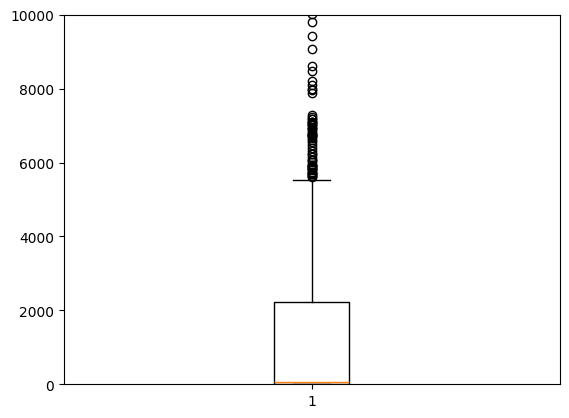

In [6]:
plt.boxplot(runtime_scope_df[~runtime_scope_df['accuracy'].isna()]['accuracy'])
plt.ylim(0, 10000)
plt.show()

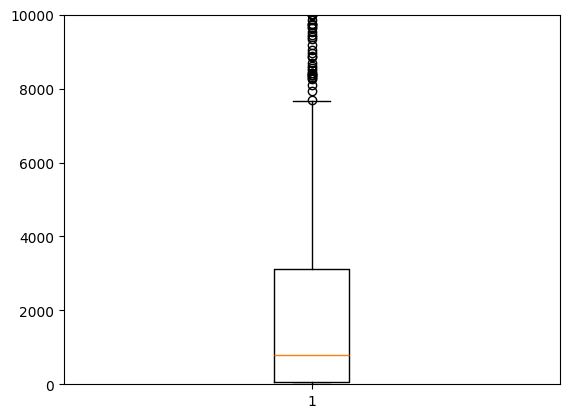

In [7]:
plt.boxplot(runtime_phertilizer_df[~runtime_phertilizer_df['accuracy'].isna()]['accuracy'])
plt.ylim(0, 10000)
plt.show()

In [8]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in runtime_scope_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(runtime_scope_df, runtime_kmeans_df, on=merge_on, suffixes=['_scope', '_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, runtime_phertilizer_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_3 = pd.merge(results_df_2, runtime_sbmclone_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_sbmclone', 'error': 'error_sbmclone'}, inplace=True)

results_df = results_df_3

['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [9]:
results_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_scope,error_scope,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_sbmclone,error_sbmclone
0,1000,5,100,0.02,5,0,3.1700,None,4.8500,None,17.63,None,0,None
1,1000,5,100,0.02,5,1,1.8000,None,3.2100,None,24.49,None,0,None
2,1000,5,100,0.02,5,2,0.9500,None,5.8560,None,32.16,None,0,None
3,1000,5,100,0.02,5,3,0.9000,None,10.4220,None,17.43,None,0,None
4,1000,5,100,0.02,5,4,44.1788,None,8.7348,None,18.89,None,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,20.8925,None,128.9200,None,16828.15,None,0,None
1211,10000,15,1000,0.10,15,1,392.2700,None,165.6200,None,NaN,[Errno 2] No such file or directory: '../data/...,0,None
1212,10000,15,1000,0.10,15,2,272.7500,None,113.9100,None,16437.69,None,0,None
1213,10000,15,1000,0.10,15,3,0.0100,None,129.2700,None,25893.01,None,0,None


In [10]:
common_results = results_df.dropna(
    subset=['accuracy_scope', 'accuracy_phertilizer', 'accuracy_kmeans', 'accuracy_sbmclone']
)
common_results['accuracy_scope_all'] = common_results['accuracy_scope'] + common_results['accuracy_kmeans']
common_results

/localscratch/ipykernel_2456400/2757653678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_results['accuracy_scope_all'] = common_results['accuracy_scope'] + common_results['accuracy_kmeans']


,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_scope,error_scope,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_sbmclone,error_sbmclone,accuracy_scope_all
0,1000,5,100,0.02,5,0,3.1700,None,4.8500,None,17.63,None,0,None,8.0200
1,1000,5,100,0.02,5,1,1.8000,None,3.2100,None,24.49,None,0,None,5.0100
2,1000,5,100,0.02,5,2,0.9500,None,5.8560,None,32.16,None,0,None,6.8060
3,1000,5,100,0.02,5,3,0.9000,None,10.4220,None,17.43,None,0,None,11.3220
4,1000,5,100,0.02,5,4,44.1788,None,8.7348,None,18.89,None,0,None,52.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,0.7000,None,137.9400,None,11106.84,None,0,None,138.6400
1210,10000,15,1000,0.10,15,0,20.8925,None,128.9200,None,16828.15,None,0,None,149.8125
1212,10000,15,1000,0.10,15,2,272.7500,None,113.9100,None,16437.69,None,0,None,386.6600
1213,10000,15,1000,0.10,15,3,0.0100,None,129.2700,None,25893.01,None,0,None,129.2800


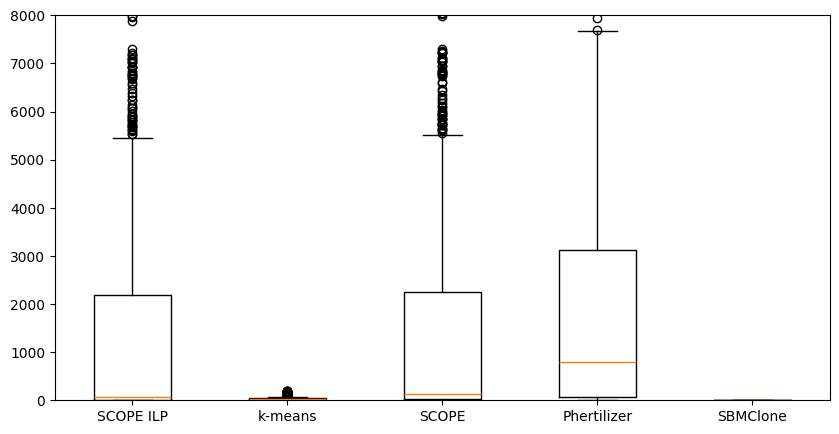

In [11]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [
        common_results['accuracy_scope'], 
        common_results['accuracy_kmeans'], 
        common_results['accuracy_scope_all'], 
        common_results['accuracy_phertilizer'],
        common_results['accuracy_sbmclone'], 
    ],
    tick_labels=[
        'SCOPE ILP', 
        'k-means', 
        'SCOPE',
        'Phertilizer', 
        'SBMClone', 
    ]
)

plt.ylim(0, 8000)

plt.show()

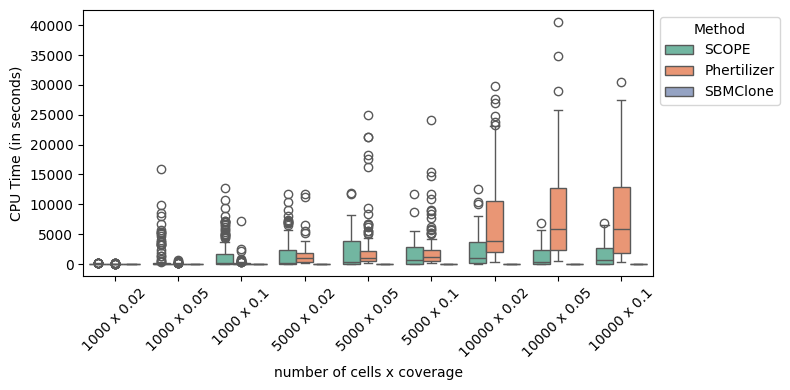

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: select relevant accuracy columns
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_scope_all",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

# Step 2: reshape (melt) the DataFrame
df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

# Step 3: make nicer method names (optional)
df_melted["method"] = df_melted["method"].replace({
    "accuracy_scope_all": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})

# Step 4: convert to categorical for clean axis ordering
df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

# Step 5A: grouped boxplot by ncells
# plt.figure(figsize=(10, 6))
# sns.boxplot(
#     data=df_melted,
#     x="ncells",
#     y="accuracy",
#     hue="method",
#     palette="Set2"
# )
# plt.title("Accuracy comparison by ncells")
# plt.xlabel("Number of Cells")
# plt.ylabel("Accuracy")
# plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


# Step 5B: boxplots faceted by coverage
# sns.catplot(
#     data=df_melted,
#     x="ncells",
#     y="accuracy",
#     hue="method",
#     col="coverage",
#     kind="box",
#     palette="Set2",
#     col_wrap=2,
#     height=4,
#     aspect=1.2
# )
# plt.subplots_adjust(top=0.85)
# plt.suptitle("Accuracy comparison across ncells and coverage")
# plt.show()


# Step 5C (optional): single grouped axis combining ncells + coverage
df_melted["group"] = df_melted["ncells"] + " x " + df_melted["coverage"]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette="Set2"
)
# plt.title("Pairwise ancestry accuracy (by ncells and coverage)")
plt.xlabel("number of cells x coverage")
plt.ylabel("CPU Time (in seconds)")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1, 1), loc='upper left')
# plt.ylim(0, 1)
plt.tight_layout()
plt.show()


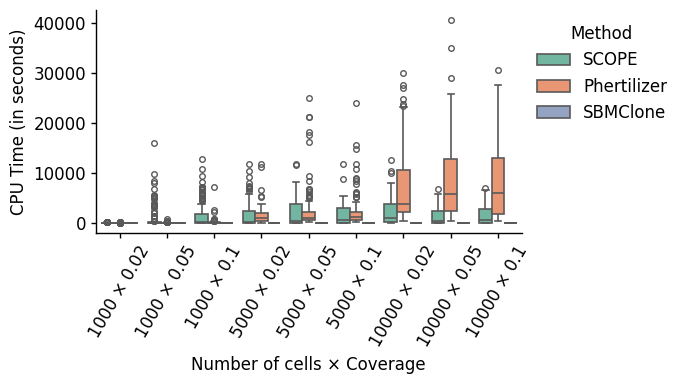

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # optional for color palettes

# Example: using your melted DataFrame df_melted
# Make a group column combining ncells and coverage
df_melted["group"] = df_melted["ncells"] + " × " + df_melted["coverage"]

# Choose a clean color palette
palette = sns.color_palette("Set2", n_colors=df_melted["method"].nunique())

# Set global font sizes (Nature-style)
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})

fig, ax = plt.subplots(figsize=(7, 4))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("CPU Time (in seconds)")
# ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../data/simulation/runtime.svg")
plt.show()
